图片的显示与读写操作
===

# 1.最大池化
网格内的值不取平均值，而是取网格内的最大值进行池化操作

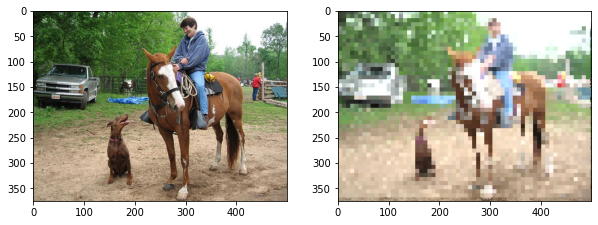

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")
out = img.copy()

H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)



# 2.伽玛矫正

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大RGB的值来排除显示器的影响，达到对图像修正的目的。由于$x'=cI_{in}^g$引起非线性变换，在该式中，$x$被归一化，限定在$[0,1]$范围内。$c$是常数，$g$为伽马变量（通常取2.2），因此，使用下面的式子进行伽马校正
$$I_{out} ={\frac{1}{c}I_{in}}^{\frac{1}{g}}$$

| 显示屏上的图像显示 | $\gamma$修正值|
| --------------- | ------------ |
| ![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAASABIAAD/4QCMRXhpZgAATU0AKgAAAAgABQESAAMA%0AAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdp%0AAAQAAAABAAAAWgAAAAAAAABIAAAAAQAAAEgAAAABAAOgAQADAAAAAQABAACg%0AAgAEAAAAAQAAAWigAwAEAAAAAQAAAT4AAAAA/+0AOFBob3Rvc2hvcCAzLjAA%0AOEJJTQQEAAAAAAAAOEJJTQQlAAAAAAAQ1B2M2Y8AsgTpgAmY7PhCfv/AABEI%0AAT4BaAMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJ%0ACgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGR%0AoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNU%0AVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaan%0AqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T1%0A9vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQAC%0AAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS%0A8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNk%0AZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1%0Atre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2wBD%0AAAICAgICAgMCAgMFAwMDBQYFBQUFBggGBgYGBggKCAgICAgICgoKCgoKCgoM%0ADAwMDAwODg4ODg8PDw8PDw8PDw//2wBDAQICAgQEBAcEBAcQCwkLEBAQEBAQ%0AEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/%0A3QAEABf/2gAMAwEAAhEDEQA/AP38ooooAKKKKACiiigAooooAKKKKACiikwK%0AAFopMCloAKKMCsTWPEOi6D5I1e5FubksIwQzFioy2AoJ4zQBt0VzGn+MvDWq%0A3senWN6JLmUMUQq6ltoycblHQc1NqHinw9pVy1lqF4sMygEqQ2cEZHQGgDoa%0AKydL1rSdaWR9LuFuBEQGIBGCenUCuej+I/guaNZYdSDo4DKyxykEHoQQuCKA%0AO3orK0jWNL121N7pM4uIQ7IWAIw69QQQCCKns9Qs7+W7htn3vYzeRKP7smxZ%0AMf8AfLqfxoAvUVRub+ztLm0s53xLeuyRL13MiNIfyVTRZ6jaX8l1HavvNnKY%0AJcdpAquR+AYUAXqK5K58c+E7S4ktbjUEWWKQxMNrnDqcFchcZBFXtL8UaDrN%0A01lpt2s06IZCm1lOwEAn5gOMkCgDforj5vHnhO3lhhl1BA07TKvU4+zsyOzY%0A6KGUgE8E9K27nWdJtdK/ty5uESw2LJ53Vdj42nj1yMfWgDVoriz8QfBwxu1E%0AKCQMtHIBycDJK4re1TWtJ0VI31S4W3WUkLkE5I69AaANaiue0/xV4e1S6Wy0%0A+8WaZwSFAYEgDJ6iugwD1oAWikwKMCgBaKKKACiiigAooooAKKKKACiiigAo%0AoooA/9D9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACvGviuI0ey1Hzx%0ADJpNpf3uxt6iWOKNTIqsn8YAyB3GfSvZa43xP4KsfFgeLUby6jglheFooZdi%0AFJFZH4weWVipIPSgDzHQLGW18cWn264RpdOu5rMRxmWRnd7NJi/z8BFSVcn1%0AwO9a/iy4162XXr3TtXydMMR2vaRMimZsiLceSUQqT9RXU2Hw9sdO1JtVg1TU%0AGnklE0hefcHbbGh3fL0KxIpHcAVp6n4O0zUrQ2Bklgt5rhrmdI3x57s4chz1%0AIyAMenFAGRoM93p2p6xb6nqhuP7MjVnia3jhBR1DrMGXqvDr9Qa+dtOvho9r%0AoelpKhUaIssiPNMpSeKOHOdo4yXYADjivq7V/Dela0t19rQiS8tJLKR0O1jB%0AL95cj9PTJ9ahi8K6VFeX1+QzzX0QgJY5EcKjAjjH8K5JP1oA5b4RywzeDLaV%0AGR5pdss7KWO6WRFZmbd3PfHFUtF0vXb3XvFkum6w1hENUAMYgSTLfY7bLZY5%0A59Pau3k8M2jaRZ6NBc3FrDZIiI0EnluVjXYAxwc8frWHb/DvTbSS4lttT1GN%0A7qTzZSLk/O+1U3HjrtUD8KAPNPilA83iHVLkWouHsNItJIpTMY2tmee4DOig%0AjJYAA/QVcvfDtjo0o32siatDrGmSm93uBdLdXke98A7cn50ZccADsRXpV94A%0A8NapKLjVInvJhbRWu+SQlikTM6k4xlsucnvWtqfh+21bULO9vJ5ilk6SpAGx%0AE0kZJR2XuVJyPcCgD581/T767hmuFmWKC21a/kjV2O1pBcyK52AjcQjcbiBz%0AxzXXaDYavHf2GmWsqW9z/Yl0kFzuMmd80B80g5OQSflJ6j0rtpfh7pczXQe9%0AuxHdzy3DRLKBGHlYu2FKnuauaF4J03w/qCahaXNxM0cD26LNJvVUd1c7eBjl%0ARQB8g6lY21no2m38aDZcaZp32+Q5LmOL55WUAjl0Yhh3xwMnNe3abbxXnwpv%0A7eedrS3vL3yomkBxAqzpGoZRyihk5/ug56V28vwr8NT6ZHpkjTFEgS2Db+RE%0AibCB2BZepxn0xW/eeD9LubW4s7aSaxju5BLKLd9u8hBHgggjBAGR3PNAHz/q%0AVrPdWctve3UUMJXUGZg87nGmXaW0gVScFnkYBB3zXuHiJdQvNW02zstSaza9%0AR8Q/Z45dojBZpGL8gZKpj1IrKj+FWjQypOmp6hvjM7KTcZwbmZbiU8r/ABSq%0Arn3Fdi3h62KM6XEy3Zt0tvtO/MwRGLdfUk5Y4549KAPMvCt5rk8mh3Gp6xtO%0ApvcbQtpEqM1s5Bi3DkM6BiPoa9trnLLwtpFlpNhowRpYdNkSWJnbLiVGLby3%0AqSTn1yRXR0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//R/fyiiigA%0AooooAKKKgmKeU5lby12nLZxtGOTntj1oAnorwT4E6z4cvrTxRp3h3WYtWhst%0AauipW8+2yCGTb5btIzu5DkNhmJ3EHB4Ney61etpmj3+pRKHe0glmVT0JjQsA%0AfbigDWorL8rWv+fq3/8AAd//AI7R5Wtf8/Vv/wCA7/8Ax2gDUorL8rWv+fq3%0A/wDAd/8A47R5Wtf8/Vv/AOA7/wDx2gDUorL8rWv+fq3/APAd/wD47R5Wtf8A%0AP1b/APgO/wD8doA1KKwb19Zs7Oe6+0W7eRGz7fIcZ2jOM+bVryta/wCfq3/8%0AB3/+O0AalFZfla1/z9W//gO//wAdo8rWv+fq3/8AAd//AI7QBqUVl+VrX/P1%0Ab/8AgO//AMdo8rWv+fq3/wDAd/8A47QBqUVl+VrX/P1b/wDgO/8A8dqrevrN%0AnZz3X2i3byI2fb5DjO0ZxnzaAN6isvyta/5+rf8A8B3/APjtHla1/wA/Vv8A%0A+A7/APx2gDUorL8rWv8An6t//Ad//jtHla1/z9W//gO//wAdoA1KKy/K1r/n%0A6t//AAHf/wCO0eVrX/P1b/8AgO//AMdoA1KKwb19Zs7Oe6+0W7eRGz7fIcZ2%0AjOM+bVryta/5+rf/AMB3/wDjtAGpRWX5Wtf8/Vv/AOA7/wDx2jyta/5+rf8A%0A8B3/APjtAGpRWX5Wtf8AP1b/APgO/wD8do8rWv8An6t//Ad//jtAGpRWX5Wt%0Af8/Vv/4Dv/8AHaq3r6zZ2c919ot28iNn2+Q4ztGcZ82gDeorL8rWv+fq3/8A%0AAd//AI7R5Wtf8/Vv/wCA7/8Ax2gDUorL8rWv+fq3/wDAd/8A47R5Wtf8/Vv/%0AAOA7/wDx2gDUorL8rWv+fq3/APAd/wD47SeXrX/P1b/+A7//AB2gDSIxSAY/%0ACvGPjB8RtR+F3hB9bRre+1O6lS00+zELhrm7mOETiXOByzewwOSK9o44Nayo%0ATjCNRrR3S+Vr/mZqonJxW6H0UUVkaH//0v38ooooAKK8sv8A4li11bUNLg04%0AS/2dN5DO9wke5tivkKQTjDCum8IeKk8V219Mtv8AZnsLn7M67xIC3lRy5DDA%0AxiQD6g0AdbRWNrWtaX4e06XVdauVtbSEqGds/ekYIigDJZmYhVUAliQACTVC%0A18W+Grvw9N4qi1GIaTbrK01w58tYhASsokD4KFCpDKwBUggjNAHUVz/iz/kV%0AtZ/68rj/ANFtTPD/AIn0PxRazXWg3XnrbSmGZSjxyRShQ2ySOQK6HaysAwGV%0AII4INP8AFn/Iraz/ANeVx/6LagDoKKKKACiiigAooooAzNa/5A19/wBe8v8A%0A6Aa06zNa/wCQNff9e8v/AKAa06ACiiigAooooAKzNa/5A19/17y/+gGtOszW%0Av+QNff8AXvL/AOgGgDTooooAKKKKACiiigDM1r/kDX3/AF7y/wDoBrTrM1r/%0AAJA19/17y/8AoBrToAKKKKACiiigArM1r/kDX3/XvL/6Aa06zNa/5A19/wBe%0A8v8A6AaANOiiigAooooAYKjZ0jUuxCqoySegxUpwK+avjn4h1XXLvTvgh4Lm%0AaPXPFgJvZ05NjpSnE8zehkGUTPXkZB2104LDOrUUE7Lq+yW7+4xxFVQg5P5L%0AuzlfDu/40+OdW+LF2DJ4V8KxXVh4fQ/cuLjaVub0A9RxsjP8mU19fY64FcdZ%0A+HtK8J+CR4a0KEW9hptk0EKDsqIRknux6sepJJPNdhzitcfilVn7ukVol5L9%0AXu/MjC0XCPvayer9SSiiiuE6T//T/fyiiigD5i8SXukQarql0Lr7LPKNSuH8%0Aq6QxyvbQxmB1643KQrD+8pAr0/4bNYpHqkenurRSzxzbmmWWWVzDGjyEDovy%0AhV/3Se9dkfDPhtjk6Vakn/pin+FXLLSdL05mfT7OG2ZxhjHGqEj3wBQBw3xK%0A0jV9S0zTLvRrQ6hPpGqWV+1qjojzxwSfOqNKypvCkuoZlBZQMjOa4u08L6re%0AeFvEukeIdCvVh8U3Go6g0VrPai4tfmiWCHLS+X58gBlBBaJWDB26bvfaKAPH%0A/hd4b8Q6XeeJPEHiWS7M+uXULxJfm0N0sNvbpCGl+xKsAZmDYCZwgXcd2QPQ%0APFn/ACK2s/8AXlcf+i2roK5/xZ/yK2s/9eVx/wCi2oAu/wBk2v8AfuP/AAJm%0A/wDi6P7Jtf79x/4Ezf8AxdadFAGZ/ZNr/fuP/Amb/wCLo/sm1/v3H/gTN/8A%0AF1p0UAZn9k2v9+4/8CZv/i6P7Jtf79x/4Ezf/F1p0UAczq+mW0elXsivOSkE%0AhGZ5WHCnqC+D9DWn/ZNr/fuP/Amb/wCLo1r/AJA19/17y/8AoBrToAzP7Jtf%0A79x/4Ezf/F0f2Ta/37j/AMCZv/i606KAMz+ybX+/cf8AgTN/8XR/ZNr/AH7j%0A/wACZv8A4utOigDM/sm1/v3H/gTN/wDF1mavpltHpV7IrzkpBIRmeVhwp6gv%0Ag/Q101Zmtf8AIGvv+veX/wBANAB/ZNr/AH7j/wACZv8A4uj+ybX+/cf+BM3/%0AAMXWnRQBmf2Ta/37j/wJm/8Ai6P7Jtf79x/4Ezf/ABdadFAGZ/ZNr/fuP/Am%0Ab/4uj+ybX+/cf+BM3/xdadFAHM6vpltHpV7IrzkpBIRmeVhwp6gvg/Q1p/2T%0Aa/37j/wJm/8Ai6Na/wCQNff9e8v/AKAa06AMz+ybX+/cf+BM3/xdH9k2v9+4%0A/wDAmb/4utOigDM/sm1/v3H/AIEzf/F0f2Ta/wB+4/8AAmb/AOLrTooAzP7J%0Atf79x/4Ezf8AxdZmr6ZbR6VeyK85KQSEZnlYcKeoL4P0NdNWZrX/ACBr7/r3%0Al/8AQDQAf2Ta/wB+4/8AAmb/AOLo/sm1/v3H/gTN/wDF1p0UAZn9k2v9+4/8%0ACZv/AIuj+ybX+/cf+BM3/wAXWnRQB534413w58P/AApqXi/Xp547PTITI2Lm%0Abc7dEjXL8s7EKvua8w+B3w+1NLO++JvjtJV8V+LmE8qebKGs7P8A5d7UHcG+%0ARcFs85wDyua566/4v18WPsSDzfAvw+uQ0x6x6jrCjhPRo7cHnsTwcqwI+seO%0A3SvYrP6vR9ivilrLyW6Xz3fyR59L97U5/sx0Xm+r/Q5vVtMto9KvZFefKwSE%0AZnlYcKeoL4P0NdPWZrX/ACBr7/r3l/8AQDWnXjnoBRRRQB//1P38ooooAKK5%0Au88X+G9PuZLO8vkimiOGUhsg9ewrT0zVtO1mBrnTJxcRIxQsARhgAccgdiKA%0AOZ8ceJb3w1p1mdLhjn1DVL62sLYTEiJZLh8F328lUQM2BgsQFyM5HNWvj3Xf%0A+EG8U63Np0V3rfhZ7+B7eBykNzLaJ5iFC2WRZEKEg7ipJGWwCez8VeGLPxZp%0AiafdTzWckE8N1b3FuUE0E9u4eN08xXQ4IwQyspBIIINcpN8K9KufD174autT%0Av5rXVEvPtrF4Q9zPeOkhuHKxACSPZtjVQsYUlWRhjABF8KPH9x8QtK1HUjJb%0AXlrZ3f2eC8tEkiiuV8mORiIZiZIyjuYzuPO3cODgdz4s/wCRW1n/AK8rj/0W%0A1ZXhXwbD4XudU1KTUbrVtQ1eSOS5uboQq7eTGIo1CW8UMYCqOyZPcnjGr4s/%0A5FbWf+vK4/8ARbUAXf7Wtf7lx/4DTf8AxFH9rWv9y4/8Bpv/AIitOigDM/ta%0A1/uXH/gNN/8AEUf2ta/3Lj/wGm/+IrTooAzP7Wtf7lx/4DTf/EUf2ta/3Lj/%0AAMBpv/iK06KAOZ1fU7aTSr2NUnBeCQDMEqjlT1JTA+prT/ta1/uXH/gNN/8A%0AEUa1/wAga+/695f/AEA1p0AZn9rWv9y4/wDAab/4ij+1rX+5cf8AgNN/8RWn%0ARQBmf2ta/wBy4/8AAab/AOIo/ta1/uXH/gNN/wDEVp0UAZn9rWv9y4/8Bpv/%0AAIiszV9TtpNKvY1ScF4JAMwSqOVPUlMD6mumrM1r/kDX3/XvL/6AaAD+1rX+%0A5cf+A03/AMRR/a1r/cuP/Aab/wCIrTooAzP7Wtf7lx/4DTf/ABFH9rWv9y4/%0A8Bpv/iK06KAMz+1rX+5cf+A03/xFH9rWv9y4/wDAab/4itOigDmdX1O2k0q9%0AjVJwXgkAzBKo5U9SUwPqa0/7Wtf7lx/4DTf/ABFGtf8AIGvv+veX/wBANadA%0AGZ/a1r/cuP8AwGm/+Io/ta1/uXH/AIDTf/EVp0UAZn9rWv8AcuP/AAGm/wDi%0AKP7Wtf7lx/4DTf8AxFadFAGZ/a1r/cuP/Aab/wCIrM1fU7aTSr2NUnBeCQDM%0AEqjlT1JTA+prpqzNa/5A19/17y/+gGgA/ta1/uXH/gNN/wDEUf2ta/3Lj/wG%0Am/8AiK06KAMn+1rX/nnOP+3ab/4ivBvjb8R9TtLSz+HPgLzT4u8WEwW7eVKp%0As7bpPdsNu7CLnbgZzyM7cV7B418YaN4B8L6h4t8QzeVZadEZHx9526KiA9Wd%0AiFUepryH4JeEdbuLjUfjF4+i2eKPFaqY4G/5h+nDmC2UHkEjDP0JOMjcDn1c%0ABTjCLxNRXS2Xd9Pkt393U4cVNyaower3fZf5voehfD7w54d+HXhHT/COhw3A%0At7GPaXNtNvlkPLyP8n3nYkn06DgCu2/ta16bJ/8AwGm/+IrSwaK8yrVlOTnJ%0A3b1bOunBRioxVkjnNX1O2k0q9jVJwWgkAzBKo5U9SUwPqa6aszWv+QNff9e8%0Av/oBrTqSwooooA//1f38ooooA8R1qXxDGLi5sda8wRapZ6ezPZxFSbmaKN9p%0A6nyxJj/eBHau38INeefqdteagbqSyn8h4mgSEoQAyuNnUOjKR+XrVq48G6ZO%0AthAsksVrYTrciFHwkkyy+crP3JEg3fWt+PTbOHUJ9VjjC3NzHHFIw/iWIsVz%0A9Nx5oAvUV5H8Yrlbbw3Yfb5jb6PJqtgmqSbzGi2TTDf5jgjbEW2rISQNhbd8%0Auawfhvd+G77QNX8N3d1DcaJe3uqSaZFJLuSXSoJI1kaIk8wRyyFVYHaFK7fl%0A20Ae9Vz/AIs/5FbWf+vK4/8ARbV5p8EtGsrbw/feKdPtvsNt4pumvrS3G4LF%0AY7RHaYUngyRKJnHUNIR0Ar0vxZ/yK2s/9eVx/wCi2oA6Cisvzda/59bf/wAC%0AH/8AjVHm61/z62//AIEP/wDGqANSisvzda/59bf/AMCH/wDjVHm61/z62/8A%0A4EP/APGqANSisvzda/59bf8A8CH/APjVHm61/wA+tv8A+BD/APxqgBda/wCQ%0ANff9e8v/AKAa065nV5dXOlXgktoFQwSbiJ2JA2nOB5Qz+YrS83Wv+fW3/wDA%0Ah/8A41QBqUVl+brX/Prb/wDgQ/8A8ao83Wv+fW3/APAh/wD41QBqUVl+brX/%0AAD62/wD4EP8A/GqPN1r/AJ9bf/wIf/41QBqVma1/yBr7/r3l/wDQDSebrX/P%0Arb/+BD//ABqs3V5dXOlXgktoFQwSbiJ2JA2nOB5Qz+YoA6aisvzda/59bf8A%0A8CH/APjVHm61/wA+tv8A+BD/APxqgDUorL83Wv8An1t//Ah//jVHm61/z62/%0A/gQ//wAaoA1KKy/N1r/n1t//AAIf/wCNUebrX/Prb/8AgQ//AMaoAXWv+QNf%0Af9e8v/oBrTrmdXl1c6VeCS2gVDBJuInYkDac4HlDP5itLzda/wCfW3/8CH/+%0ANUAalFZfm61/z62//gQ//wAao83Wv+fW3/8AAh//AI1QBqUVl+brX/Prb/8A%0AgQ//AMao83Wv+fW3/wDAh/8A41QBqVma1/yBr7/r3l/9ANJ5utf8+tv/AOBD%0A/wDxqs3V5dXOlXgktoFQwSbiJ2JA2nOB5Qz+YoA6RsHg0w8Cs0y6zn/j1t/+%0A/wC//wAar5y+MPi3xV4i1a3+Bvgby7fXdeiMmoXcUjONO07pI7HYu15B8qd+%0AexKmurB4R1pqCdlu30S6tmGIrKnG717Lu+xlw5/aE+Jgum/e/DzwNc/ux1j1%0ATVo/4vRoYM8dmJ7hiB9a9uK4fwn4bXwP4b0/wr4e0+3g0/TYhFEvntk45LMf%0AJ5ZiSzHuSTXSebrPQWsH/gQ//wAarTH4pVJKNNWjHRL9X5vdkYWi4pylrJ6v%0A/L5GvRWV5utf8+tv/wCBD/8Axql83Wv+fW3/APAh/wD41XCdQutf8ga+/wCv%0AeX/0A1p1zOry6udKvBJbQKhgk3ETsSBtOcDyhn8xXTUAFFFFAH//1v38oooo%0AAKKKKAEIzwaXArG1rWtL8PadLqutXK2tpCVDO2fvSMERQBkszMQqqASxIABJ%0AqvpnibQdX0ZvENhfRtpyCUyTMfLWPyCVlEm/aUMZUhwwBUgg4xQB0Nc/4s/5%0AFbWf+vK4/wDRbUeH/Emj+KLQ3+iTPPArbd7RSRBsgMCvmKu5SCCGXKnsaPFn%0A/Iraz/15XH/otqAOgooooAKKKKACiiigDM1r/kDX3/XvL/6Aa06zNa/5A19/%0A17y/+gGtOgAooooAKKKKACszWv8AkDX3/XvL/wCgGtOszWv+QNff9e8v/oBo%0AA06KKKACiiigAooooAzNa/5A19/17y/+gGtOszWv+QNff9e8v/oBrToAKKKK%0AACiiigBOlZetHOjX3H/LvL/6Aa0zziuU8aa1pvh7wpq+s6zcLa2VpbSvJI5w%0AANpA+pJwABySQBzThFyajFXbFKSSuzl/iz8SbT4Z+GTqawG/1e/kW00yxTmS%0A7vJeI0AHO0Hlj2HTkgHI+DXw2vPA+k3WteKZhqHi/wASSC71a765lP3YUPaO%0AEHaoHHUjAwBw/wAKtA1b4l+Kf+F8+ObZ7eNkaLw5p8v/AC52T/8ALy46edOO%0Ac9lPUgrt+oTxmvWxclQp/Vobv4n59l5Lr3fojhoRdSftpbdF+vqx9FFFeQd4%0AUUUUAZmtf8ga+/695f8A0A1p1ma1/wAga+/695f/AEA1p0AFFFFAH//X/fyi%0AiigD5Yuvtl/r2oxaVBfzSXX24SvFG26FLxJFQk79p8tiNqjnvXffCG8+0jVW%0AMMtv5kgKxuGVVWPKA4ZiwZupBrPuvhdrEcuq/wBjtb2cd7/aPltG8iyf6Vbv%0AFEG524VmByOeK7bwV4Nk8N6hq2oXENvFJftFt+zlyNqLg5MhJyTzQBD8StI1%0AfUtM0y70a0OoT6Rqllftao6I88cEnzqjSsqbwpLqGZQWUDIzmvN7/wAI+MNW%0A+HvjTw8mkyWd54wOrXkSvNBttmk8uOC2mKu433CgsSgeNfmDN93d9I0UAeWf%0ADez8VWz6zJrkd9aadNNEbC21O4iuryICICYtJDJKuxpPuKZGIwTwCAOz8Wf8%0AitrP/Xlcf+i2roK5/wAWf8itrP8A15XH/otqALv9k2v9+4/8CZv/AIuj+ybX%0A+/cf+BM3/wAXWnRQBmf2Ta/37j/wJm/+Lo/sm1/v3H/gTN/8XWnRQBmf2Ta/%0A37j/AMCZv/i6P7Jtf79x/wCBM3/xdadFAHM6vpltHpV7IrzkpBIRmeVhwp6g%0Avg/Q1p/2Ta/37j/wJm/+Lo1r/kDX3/XvL/6Aa06AMz+ybX+/cf8AgTN/8XR/%0AZNr/AH7j/wACZv8A4utOigDM/sm1/v3H/gTN/wDF0f2Ta/37j/wJm/8Ai606%0AKAMz+ybX+/cf+BM3/wAXWZq+mW0elXsivOSkEhGZ5WHCnqC+D9DXTVma1/yB%0Ar7/r3l/9ANAB/ZNr/fuP/Amb/wCLo/sm1/v3H/gTN/8AF1p0UAZn9k2v9+4/%0A8CZv/i6P7Jtf79x/4Ezf/F1p0UAZn9k2v9+4/wDAmb/4uj+ybX+/cf8AgTN/%0A8XWnRQBzOr6ZbR6VeyK85KQSEZnlYcKeoL4P0Naf9k2v9+4/8CZv/i6Na/5A%0A19/17y/+gGtOgDM/sm1/v3H/AIEzf/F0f2Ta/wB+4/8AAmb/AOLrTooAzP7J%0Atf79x/4Ezf8AxdH9k2v9+4/8CZv/AIutOigDIbS7NAWaScAck/aZv/i6+P8A%0AUYD+0J4mvfskkx+G3hJpCztNI6axqEIJAG5iDbwnuOGPrkbev+JfiLWPin4p%0Al+B3w/uWgt4greJNTi6Wls3/AC6Rt086UZBHYZBz8+33W08O6P4T8Fnw7oFs%0Atnp9hZvFDEvRVCHqepJPJJ5JJJ5Ne1Sf1WHtH/EktPJPr6vp2WvY86X7+fKv%0AhW/m+3oupuro9nGoRGnVVGABczAAD/gdO/sm1/v3H/gTN/8AF1qUV4rZ6Jmf%0A2Ta/37j/AMCZv/i6P7Jtf79x/wCBM3/xdadFAGZ/ZNr/AH7j/wACZv8A4uj+%0AybX+/cf+BM3/AMXWnRQBzOr6ZbR6VeyK85KQSEZnlYcKeoL4P0NdNWZrX/IG%0Avv8Ar3l/9ANadABRRRQB/9D9/KKKKACiiigDiPHHiW98NadZnS4Y59Q1S+tr%0AC2ExIiWS4fBd9vJVEDNgYLEBcjORzEHjzxA/gLxZrR0+O51/wudRg+z24keK%0A5uLOMyReWozJiVSh2DLAkqC2AT2virwxZ+LNMTT7qeazkgnhure4tygmgnt3%0ADxunmK6HBGCGVlIJBBBrH0vwL/Y1nJb6brt/DLP9rknn/wBGaSe6u5Ec3Lho%0ACnmR7NsaqojCsVKHC7QCXwF4ll8TaXcXFzqFnf3NtcNDKLOKaDySFVhHLFOT%0AIkmG3YbGVKkDBydzxZ/yK2s/9eVx/wCi2rO8LeErfwu2pXJvrjVNQ1edbi6u%0ArryhLI6RpCg2wxxRqqIigBUHqcsSTo+LP+RW1n/ryuP/AEW1AF3+2tF/5/rf%0A/v6n+NH9taL/AM/1v/39T/GtOigDM/trRf8An+t/+/qf40f21ov/AD/W/wD3%0A9T/GtOigDM/trRf+f63/AO/qf40f21ov/P8AW/8A39T/ABrTooA5nVtX0qXS%0Ar2OO9gd3gkAAkUkkqcADNaf9taL/AM/1v/39T/GjWv8AkDX3/XvL/wCgGtOg%0ADM/trRf+f63/AO/qf40f21ov/P8AW/8A39T/ABrTooAzP7a0X/n+t/8Av6n+%0ANH9taL/z/W//AH9T/GtOigDM/trRf+f63/7+p/jWZq2r6VLpV7HHewO7wSAA%0ASKSSVOABmumrM1r/AJA19/17y/8AoBoAP7a0X/n+t/8Av6n+NH9taL/z/W//%0AAH9T/GtOigDM/trRf+f63/7+p/jR/bWi/wDP9b/9/U/xrTooAzP7a0X/AJ/r%0Af/v6n+NH9taL/wA/1v8A9/U/xrTooA5nVtX0qXSr2OO9gd3gkAAkUkkqcADN%0Aaf8AbWi/8/1v/wB/U/xo1r/kDX3/AF7y/wDoBrToAzP7a0X/AJ/rf/v6n+NH%0A9taL/wA/1v8A9/U/xrTooAyTrWjf8/1v/wB/U/xrwT4vfFi7tbq1+Gnw0uYL%0AnxfrqkCcupg0y26PdTNyAQPuKep5weFbqPi58Um8C2tnoHhu1/tjxjrzGHS7%0ABeSz95peRthj6sSRnGMgbmV/wj+FyeANPu9T1y6/tbxXrji41XUH5aWU9I06%0AbYo+iLgeuBwB62FowpQWIrK/8q7vu/Jfi9O9uGvUlOXsqb9X28vV/gXPhn4T%0A8G/DDwxD4e0i/inlZjLdXUsqma7uX5kmkJYklj0GTgYHauz1bV9Kl0q9jjvY%0AHZ4JAAJFJJKnAAzXSn9Ky9Zx/Y1//wBcJf8A0A15tWrKpJzm7t7s66dOMEox%0AVkh/9taL/wA/1v8A9/U/xo/trRf+f63/AO/qf41p0VmWZn9taL/z/W//AH9T%0A/Gj+2tF/5/rf/v6n+NadFAGZ/bWi/wDP9b/9/U/xo/trRf8An+t/+/qf41p0%0AUAczq2r6VLpV7HHewO7wSAASKSSVOABmumrM1r/kDX3/AF7y/wDoBrToAKKK%0AKAP/0f38ooooA+e7X4neJpNO1GdLe3lma5dICJAVhQkhGYH7wKoWUdSSBXon%0AgjXtS1HzdN1MGZoUWWO4O0NJE5IXeqkhWyDgjggeoNeOax4G1621DULlbeFQ%0Abi2YLaxME2rBKWKn73BwMY5JFd58LNB1LRL29jvoXjxYafGWZcDzQ07ugPco%0AHXJ96APZ6K8y+J2pahY6VpVpY3clguratYWM9xEQskcM8oDBGOdrSYEYbqN+%0AVw2DXMaB4xvfDvgvxVeXhuddPh7Ub+2sl5mubmKFlCRkqCz+XI/ks5BIC5ck%0AgkgHulc/4s/5FbWf+vK4/wDRbV5R8CvEeo67pviK31fVptZu7DVpEaaWGSBQ%0AJIYpCsaSKpWMOX2JyVXAPYn1fxZ/yK2s/wDXlcf+i2oA6Cisvzda/wCfW3/8%0ACH/+NUebrX/Prb/+BD//ABqgDUorL83Wv+fW3/8AAh//AI1R5utf8+tv/wCB%0AD/8AxqgDUorL83Wv+fW3/wDAh/8A41R5utf8+tv/AOBD/wDxqgBda/5A19/1%0A7y/+gGtOuZ1eXVzpV4JLaBUMEm4idiQNpzgeUM/mK0vN1r/n1t//AAIf/wCN%0AUAalFZfm61/z62//AIEP/wDGqPN1r/n1t/8AwIf/AONUAalFZfm61/z62/8A%0A4EP/APGqPN1r/n1t/wDwIf8A+NUAalZmtf8AIGvv+veX/wBANJ5utf8APrb/%0AAPgQ/wD8arN1eXVzpV4JLaBUMEm4idiQNpzgeUM/mKAOmorL83Wv+fW3/wDA%0Ah/8A41R5utf8+tv/AOBD/wDxqgDUorL83Wv+fW3/APAh/wD41R5utf8APrb/%0AAPgQ/wD8aoA1KKy/N1r/AJ9bf/wIf/41R5utf8+tv/4EP/8AGqAF1r/kDX3/%0AAF7y/wDoBrTrmdXl1c6VeCS2gVDBJuInYkDac4HlDP5itHzda/59bf8A8CH/%0AAPjVAGifpXlPxV+KOm/DbSIXEDanrupv9n0zTYeZru4PAAAyQikje2OBxySA%0Aa3xM+Kkfwy0iK81CyS81K/kEGn6fbzs9zeXDYASNPKzgEjc3Qe5IB4/4ZfDT%0AxZba5cfFP4lJb6l4x1NNsamZhDplseltbqI2AIBw7gnPPJyzP6eFwsYw9vX+%0AHourf+Xd/Lc4q9ZuXsqe/V9l/ma/wk+F+peH7m8+IPxAmXUvHGuqDdTDmO0h%0A6raW391E4BI+8R1IANe81mGXWe9tb/8Af9//AI1R5us9ra3/AO/7/wDxquTF%0AYmVabnP/AICXZeR0UaMYR5YmtWXrX/IGv/8Ar3l/9ANJ5utf8+tv/wCBD/8A%0Axqs7V5dXOlXgktoFQwSbiJ2JA2nOB5Qz+YrnNTpqKy/N1r/n1t//AAIf/wCN%0AUebrX/Prb/8AgQ//AMaoA1KKy/N1r/n1t/8AwIf/AONUebrX/Prb/wDgQ/8A%0A8aoA1KKy/N1r/n1t/wDwIf8A+NUebrX/AD62/wD4EP8A/GqAF1r/AJA19/17%0Ay/8AoBrTrmdXl1c6VeCS2gVDBJuInYkDac4HlDP5iumoAKKKKAP/0v38oooo%0AAKKKKAMzU9K0vXLCbS9as4b+ynG2WC4jWWJwDnDIwIPIB5FVLDw54d0r7J/Z%0AelWtn9gikgtvJgSPyIZmV5I49oGxXZFZlGASoJ5AqXWta0vw9p0uq61cra2k%0AJUM7Z+9IwRFAGSzMxCqoBLEgAEmqdj4q8PajoUniWzvUk02ISmSXDDYYCVkV%0AlIDKyMpVlIDAjBGaANe2sbOyed7S3jga6lM0pjQKZJCApd8feYhQMnnAHpWb%0A4s/5FbWf+vK4/wDRbU3w74m0PxVZy32hXX2mKCVoJQUeOSKVACUkjkCujAMD%0AhgDgg9CKd4s/5FbWf+vK4/8ARbUAdBRRRQAUUUUAFFFFAGZrX/IGvv8Ar3l/%0A9ANadZmtf8ga+/695f8A0A1p0AFFFFABRRRQAVma1/yBr7/r3l/9ANadZmtf%0A8ga+/wCveX/0A0AadFFFABRRRQAUUUUAZOtc6Pff9e8v/oBrz74o/FPR/hnp%0AcTzxPqWs6k/k6dplv81xeTngKqjJCgkbmxge5IBwvjH8WdN8Dad/wjunW7az%0A4p1mKRLDTYOZGypBllx9yJOSWPXBx0JFf4X/AAmvdF1Wb4i/Ea7XW/HOopiS%0AfH7ixiPS2tFP3VUHBbq3Pqc+phsJCEPb4jbousv8l3f3HDVrylL2dLfq+i/z%0AZU+GPwu1mLWpPip8VZE1HxpeptijX5rbS7ds4t7YcjcAcO4yTyATlmf6FFNx%0A39KASMVx4rFTqy55eiS2S7LyOihQUFZf8OSUUUVzmwVma1/yBr7/AK95f/QD%0AWnWZrX/IGvv+veX/ANANAGnRRRQAUUUUAFFFFAGZrX/IGvv+veX/ANANadZm%0Atf8AIGvv+veX/wBANadABRRRQB//0/38ooooA4+88XW0Ns9xbxGTytTg0xwe%0AMPLKkRYew35rcsdWt9QvdRsYQRJpkyQyZ6FniSYY9tsg/GvnfW38Jarpw1Ce%0AY29/Lr6LcRRyuAFh1Hymcr2PloGJ7da9S8EXOiJrmu6VoBEttEtpcvNvLs8s%0AwkjbcT/dWFAKAF+JWkavqWmaZd6NaHUJ9I1Syv2tUdEeeOCT51RpWVN4Ul1D%0AMoLKBkZzWD4VtvE+iadrc91oV2Jdeu9R1MQwTWnm224xRwwEtN5fnyrmQEM0%0AasGDOPlLez0UAeO/CTQNf0OHxFLrVvc28Op6m13b/wBoSQS6g6Nbwo7XL2zP%0AEfnQrGAcrEqA4xgeheLP+RW1n/ryuP8A0W1dBXP+LP8AkVtZ/wCvK4/9FtQB%0Ad/sm1/v3H/gTN/8AF0f2Ta/37j/wJm/+LrTooAzP7Jtf79x/4Ezf/F0f2Ta/%0A37j/AMCZv/i606KAMz+ybX+/cf8AgTN/8XR/ZNr/AH7j/wACZv8A4utOigDm%0AdX0y2j0q9kV5yUgkIzPKw4U9QXwfoa0/7Jtf79x/4Ezf/F0a1/yBr7/r3l/9%0AANadAGZ/ZNr/AH7j/wACZv8A4uj+ybX+/cf+BM3/AMXWnRQBmf2Ta/37j/wJ%0Am/8Ai6P7Jtf79x/4Ezf/ABdadFAGZ/ZNr/fuP/Amb/4uszV9Mto9KvZFeclI%0AJCMzysOFPUF8H6GumrM1r/kDX3/XvL/6AaAD+ybX+/cf+BM3/wAXR/ZNr/fu%0AP/Amb/4utOigDM/sm1/v3H/gTN/8XSf2Ta/37j/wJm/+LrUqvNNDbwvPO6xx%0AxqWZmICqoGSSTwAB1NCQNlH+y7XP+suP/Amb/wCLr5++IvxJltdbHw2+FdvL%0Ar3jW4X5wbqb7Jp0Z6zXbh8DGchOp49VDZOsfEfxf8YtSuPB3wQl+x6NA5h1D%0AxO6kxR/3orEcebJj+McDqCMq9e0fD34aeFvhjov9j+G4CGlbzLm6lO+5upj1%0AkmkPLMST7DPAFezDDwwy566vLpH9ZdvTd+XXzpVpVny0naPV/wCX+ZwPgr4M%0AaZ4F0rU/EWtXk2u+LtRt5Gv9VnkcSSHbny0GcLEuAAvcAZ4AA9t/sm17vcf+%0ABM3/AMXS61/yBr7/AK4S/wDoBrSH1rzMRialWXPUd3/Wi8vI7aVKMFyxWhnf%0A2Ta/37j/AMCZv/i6P7ItP79x/wCBM3/xdalFYmhmf2Ta/wB+4/8AAmb/AOLo%0A/sm1/v3H/gTN/wDF1p0UAZn9k2v9+4/8CZv/AIuszV9Mto9KvZFeclIJCMzy%0AsOFPUF8H6GumrM1r/kDX3/XvL/6AaAD+ybX+/cf+BM3/AMXR/ZNr/fuP/Amb%0A/wCLrTooAzP7Jtf79x/4Ezf/ABdH9k2v9+4/8CZv/i606KAMz+ybX+/cf+BM%0A3/xdH9k2v9+4/wDAmb/4utOigDmdX0y2j0q9kV5yUgkIzPKw4U9QXwfoa6as%0AzWv+QNff9e8v/oBrToAKKKKAP//U/fyiiigDPTSNKQELZwjczMfkXlmJYnp1%0AJJJqW3sbK0kkltYEheUKHKKFLBc4zj0yfzq3RQBxHjjxLe+GtOszpcMc+oap%0AfW1hbCYkRLJcPgu+3kqiBmwMFiAuRnIo+FPEuv8AiHQ9XSS3totc0e7utPYB%0AnFrJNDgxyDhnVHRkYryVJK5OMnc8VeGLPxZpiafdTzWckE8N1b3FuUE0E9u4%0AeN08xXQ4IwQyspBIIINc9B8Oo7PR7vSbHxBqdq1/HffabmJ4FuJbi+ZWa6Le%0AThZogu2LYqoqkjYcLtAH/DvxRrPia21uLXIrfz9G1ObTxcWm8W90IY42aSMO%0ASy7HdoXG5sPG3PYdP4s/5FbWf+vK4/8ARbVl+CvCC+CNFi0C31O51G0twqwC%0A5jtYzCijGxRawQAg9SWDMSSSa1PFn/Iraz/15XH/AKLagC7/AG1ov/P9b/8A%0Af1P8aP7a0X/n+t/+/qf41p0UAZn9taL/AM/1v/39T/Gj+2tF/wCf63/7+p/j%0AWnRQBmf21ov/AD/W/wD39T/Gj+2tF/5/rf8A7+p/jWnRQBzOravpUulXscd7%0AA7vBIABIpJJU4AGa0/7a0X/n+t/+/qf40a1/yBr7/r3l/wDQDWnQBmf21ov/%0AAD/W/wD39T/Gj+2tF/5/rf8A7+p/jWnRQBmf21ov/P8AW/8A39T/ABo/trRf%0A+f63/wC/qf41p0UAZn9taL/z/W//AH9T/GszVtX0qXSr2OO9gd3gkAAkUkkq%0AcADNdNWZrX/IGvv+veX/ANANADP7Z0b/AJ/rf/v6v+NL/bWjY/4/rf8A7+r/%0AAI1fJVFJY7QOSTXzf4j+OV1rOrS+CPgjYDxZryfLPeZI0qwz/FPOOHI7Ih55%0AAORtrpwuDqVW1Dpu9kvNvZGNbEQhv8l1foj0/wAafFPwJ4A0Z9b8S6xDFCOI%0A40cSTTP2SKNSWZj7cDqSBk18/pYeKvj/ADLffEK6/wCES8Cbg0OiJOsd9qCg%0A5Vr11OY0PXyhz9CA59I8CfBC30vWl8efEXUG8XeMWwRd3C4t7TvstIPuxgdm%0AxnuNuSK98IArv+s0sPpQ96X83b0X6vXskcvsZ1dauke3f1f6I5nRz4S0DTbf%0ASNFks7GytUCRQwvGkaKOwUHFao1rRv8An+t/+/qf41p9etHBFeTKTbu9zvjF%0AJWRzWravpUulXscd7A7vBIABIpJJU4AGa0/7a0X/AJ/rf/v6n+NGtf8AIGvv%0A+veX/wBANadSMzP7a0X/AJ/rf/v6n+NH9taL/wA/1v8A9/U/xrTooAzP7a0X%0A/n+t/wDv6n+NH9taL/z/AFv/AN/U/wAa06KAMz+2tF/5/rf/AL+p/jWZq2r6%0AVLpV7HHewO7wSAASKSSVOABmumrM1r/kDX3/AF7y/wDoBoAP7a0X/n+t/wDv%0A6n+NH9taL/z/AFv/AN/U/wAa06KAMz+2tF/5/rf/AL+p/jR/bWi/8/1v/wB/%0AU/xrTooAzP7a0X/n+t/+/qf40f21ov8Az/W//f1P8a06KAOZ1bV9Kl0q9jjv%0AYHd4JAAJFJJKnAAzXTVma1/yBr7/AK95f/QDWnQAUUUUAf/V/fyiiigAoryr%0Axn4ovPAutJrN5K8+kX9rNEsOPuXsK+ZEq/8AXZQy/wC8B613Xhu31S10Cwg1%0Ayb7RqCwobh/WUjL49gTge1AG3RXmXxO1LULHStKtLG7ksF1bVrCxnuIiFkjh%0AnlAYIxztaTAjDdRvyuGwapfD271TUNH1/RJdUlkk0/U9QsbK8kKyz+TEQFYl%0AwRI0DuY8sDkoN+TnIB61XP8Aiz/kVtZ/68rj/wBFtXHfCG81K+8ERyatezaj%0Acw6hq1ubi4IaV0ttRuIY9xUKMhEUcADjgV2Piz/kVtZ/68rj/wBFtQB0FFZf%0Am61/z62//gQ//wAao83Wv+fW3/8AAh//AI1QBqUVl+brX/Prb/8AgQ//AMao%0A83Wv+fW3/wDAh/8A41QBqUVlebrX/Prb/wDgQ/8A8apfN1r/AJ9bf/wIf/41%0AQAutf8ga+/695f8A0A1p1zOry6udKvBJbQKhgk3ETsSBtOcDyhn8xWl5utf8%0A+tv/AOBD/wDxqgDUorL83Wv+fW3/APAh/wD41R5utf8APrb/APgQ/wD8aoA0%0Ax06U39KzfN1kdbW3/wDAh/8A41Xi3jX4/wDhXwXejQ2Meta65KJpmlyPeXjP%0A/dKJFhD7Oyn0BrfD4WpVly01dmVWvCmrydke9/pXiHxS+NPgnwPDceH5pn1X%0AxBdxOkOl2C/aLtmZTjci/cXvliOMkA1wE2n/ALQ/xXUHUpY/hv4dl+9bW03m%0A6tMh7NOEZYc9toDDoQa9D8LfCzw18NNBv4fDOiW1vNPBL9pvHnea7mypLM8r%0AxbmyeduQuegFeh9VoUNa0uZ/yp/m9vuv6o5fbVKv8NWXd/ov8zz8eAvir8Z2%0AFx8V7w+FPDEnK+H9OlzcTp1AvbodQe6JwR/dYZr6K8N+F/D3g/SodC8MadFp%0AthAPkihUKue5PdmPdjknuauiTWuP9Ft+P+m7/wDxqjzdZz/x62/H/Tw//wAa%0ArmxOPnVSjoorZLRf8F+b1NqOFjF828u73Neisvzda/59bf8A8CH/APjVHm61%0A/wA+tv8A+BD/APxquE6TUorL83Wv+fW3/wDAh/8A41R5utf8+tv/AOBD/wDx%0AqgBda/5A19/17y/+gGtOuZ1eXVzpV4JLaBUMEm4idiQNpzgeUM/mK0vN1r/n%0A1t//AAIf/wCNUAalFZfm61/z62//AIEP/wDGqPN1r/n1t/8AwIf/AONUAalF%0AZfm61/z62/8A4EP/APGqPN1r/n1t/wDwIf8A+NUAalZmtf8AIGvv+veX/wBA%0ANJ5utf8APrb/APgQ/wD8arN1eXVzpV4JLaBUMEm4idiQNpzgeUM/mKAOmorL%0A83Wv+fW3/wDAh/8A41R5utf8+tv/AOBD/wDxqgDUorL83Wv+fW3/APAh/wD4%0A1R5utf8APrb/APgQ/wD8aoA1KKy/N1r/AJ9bf/wIf/41R5utf8+tv/4EP/8A%0AGqAF1r/kDX3/AF7y/wDoBrTrmdXl1c6VeCS2gVDBJuInYkDac4HlDP5iumoA%0AKKKKAP/W/fyiiigDl/FnhxfE1lZWjOqfZL+zvPmGQRazLKV/4EFI/GuooooA%0AzNT0rS9csJtL1qzhv7KcbZYLiNZYnAOcMjAg8gHkVmR+EvClvaxWUWi2SW9v%0AbzWkca20YRLa5KmaFV24EchVS6AYYgZBwK6aoJJI4I3mmcJGgLMzHAAHJJJ6%0AAUAYmgeFPC/hO3ltPC+j2ejwTP5kkdlbx26O/wDeZY1UE+5p3iz/AJFbWf8A%0AryuP/RbVU8N+M/DPi5Z38OX6Xn2YRs4AZGCSgmNwHAJjkAJRwCrYO0nBq34s%0A/wCRW1n/AK8rj/0W1AHQUUmR60ZHrTsFwAxSE4NG5R3rC1LxP4d0UE6tqtpZ%0ABevnzxxY/wC+iKcYOWiVyXNLc2+RS849K8a1f9oT4J6IGN94x059vUW832o/%0AlBvNccf2nvCep4XwN4e1/wAWbvuvp+myeUfdnl2bR74rup5ViZLmVN27tWX3%0AvQ5pY6jF2clf8fuPoPWQRo1/n/nhL/6Aa088V8tan42/aJ8S6bdroXgGy8N2%0AjQyZuNYv/NYptOT5FsA6nHQHvVw/CH4t+Kxn4h/Ey7gt262mgwpYKvqPPO6R%0Agf8AaFavLFH+LVivR3f/AJLdfe0R9dcvgg38rL8T2bxV8QfBPgWD7R4t1u00%0AsEZCzSqrsP8AYjzvb6KDXix/aC1bxcTbfBrwZqHikNwuoXK/2fp3+8JZgGfH%0AUqFUntXZ+Ff2e/hJ4Tuft9loEV9fk7mu78tezs/9/dMWCt7qBXs4VUAVRgDp%0Aij2uEp/BFzfd6L7k7/iHJXn8TUV5av73/kfMR+FHxZ+IX7z4t+M20+wk+9pH%0Ah4G2hI/uyXL5lcHoykY9DXsngr4Z+Bfh3afYfBmjW+mKwAd0XdNIB/z0lbMj%0A/wDAmNd3jnFHOPWsK+ZVakeS9o9krL7lv6s0pYOEXe133erH1ma1/wAga+/6%0A95f/AEA1p1ma1/yBr7/r3l/9ANcJ1GnRRRQAUUUUAFFFFAGZrX/IGvv+veX/%0AANANadZmtf8AIGvv+veX/wBANadABRRRQAUUUUAFZmtf8ga+/wCveX/0A1p1%0Ama1/yBr7/r3l/wDQDQBp0UUUAFFFFABRRRQBma1/yBr7/r3l/wDQDWnWZrX/%0AACBr7/r3l/8AQDWnQAUUUUAf/9f9/KKKKACiiigArk/HGh3XibwX4g8N2Mog%0AudW0+7tIpDwEeeFo1Y45wC2a6yigDxzwLpniK58VXfivW9Gk0CP+yNP0xLea%0AWCR3ktpJ5ZHH2eSRRGvmhY8sGPzEqoxn1DVdNg1jTLzSbouIL6GSCQxsUcJK%0ApVtrDlTg8Ecg81og9q5vxL4msPC9lFd3ySzyXU6W1vBAm+aeeTO2NFyBnAJJ%0AJACgsSACaadgPOG+Bmit18UeKD/3Hr3/AOOVRl/Z68KXAIuNd8Ryg/39au2/%0Am9eseG/EWneKtJTV9M8xYzJNC8cqFJYpreRoZY5FPRkkRlPUcZBIwT0Oe1dE%0AMdWj8M2YPDU3vFHzPefsn/CvUARqEmrXIPXzdSnfP/fRNLp37JfwY0og2mmM%0A+P8Anv5Vx/6Ojevpf6UfWuhZzi7cvtZW9WR9Qo3vyL7jy7R/hL4U8PFToUMe%0AnMvQ29jp8R/NbUGuw/sbUR0128/74tf/AJHroevvRg9q4p1ZS1k7m8KcY/Cj%0AmptAvbiGSCbW71o5VKsNtqMhhgjiCpv7G1L/AKDt7/3xa/8AyPXOeHPiR4f8%0AT6pHpVilzGbqGe4s5poikN7BbSLFLJA2TuVWdPvBSwYMoKnNWf8AhOtNTxdB%0A4PurO8tLi884Ws80G22uXt1DyJG+ScqvOWUBgDtJxWZZtf2NqX/Qdvf++LX/%0AAOR6P7G1L/oO3v8A3xa//I9dDRQBz39jaj/0Hb3/AL4tf/kej+xtR/6Dt7/3%0Axa//ACPXQ0UAc9/Y2pf9B29/74tf/keoZ9AvbiGSCbXL1o5VKsNtqMhhgjiC%0Aunrzvw58SPD/AIn1SPSrFLmM3UM9xZzTRFIb2C2kWKWSBsncqs6feClgwZQV%0AOaAOj/sbUv8AoO3v/fFr/wDI9H9jal/0Hb3/AL4tf/kesyfxzoEPje38Ab5H%0A1a4tXu8KhMSRoQMO/QM3UL1wMnAIz2lAHPf2NqX/AEHb3/vi1/8Akej+xtS/%0A6Dt7/wB8Wv8A8j10NFAHPf2NqX/Qdvf++LX/AOR6P7G1L/oO3v8A3xa//I9d%0ADRQBzE+gXtxDJBNrl60cqlWG21GQwwRxBU39jal/0Hb3/vi1/wDkeuc8OfEj%0Aw/4n1SPSrFLmM3UM9xZzTRFIb2C2kWKWSBsncqs6feClgwZQVOa0rPxjZal4%0AhufD+m2d1dCxkMFzeJGotIZwgkMRdmDM20jOxWUE7SQ2QADR/sbUv+g7e/8A%0AfFr/API9H9jal/0Hb3/vi1/+R66GigDnv7G1L/oO3v8A3xa//I9H9jal/wBB%0A29/74tf/AJHroaKAOe/sbUv+g7e/98Wv/wAj1DPoF7cQyQTa5etHKpVhttRk%0AMMEcQV0xIAyeAK888KfEjQPGF8llpkdzEbm1+3WclxEY0vLPcE+0QHJymWX7%0AwVsMpxhgaAOj/sbUv+g7e/8AfFr/API9H9jal/0Hb3/vi1/+R65rTPiX4e1b%0AxL/wjdtHch3nu7WG5eLFvPcWB23MSNndmM5BLKFJB2k4r0agDnv7G1L/AKDt%0A7/3xa/8AyPR/Y2pf9B29/wC+LX/5HroaKAOe/sbUv+g7e/8AfFr/API9H9ja%0Al/0Hb3/vi1/+R66GigDmJdCvJo3guNavHjkBVlK2wDKeCMiAHkehzXT1yfjD%0AxbpXgjw9eeJtZWd7SyjaR1toXnkKopdsIgPAUEljhQBliBzXSwzJcQxzx/dk%0AUMM+hGRQBPRRRQB//9D9/KKKKACiiigAooooAK8+8e+HtZ1tdE1Lw/5D6j4f%0A1FL+KG5kaKGYeTLbyRtIiSMmY5mKnY3zAZGOR6DRQBwvgLw7f+GtDng1Z4mv%0A9Qvr3ULgQMzQxyXk7zeWjMqsyoGC7iqlsbtq5wO6oooAKKKKACiiigD578Jf%0AD3x14cGhxyrp0yeDNMutN0wi5mBvPPaERyXH7j9xsihAZU83c7E5AUZ6Sy8P%0A+Op/idL4o8Q2enXGk2yyW2mNHezedaW8igyObY2ux55nVQ7eeAkYCp/H5nsF%0AFABRRRQAUUUUAFfPfhL4e+OvDg0OOVdOmTwZpl1pumEXMwN557QiOS4/cfuN%0AkUIDKnm7nYnICjPr+r+L/D2hNcpqd2sT2qRO69W/fFhGABySxRuB6ZrS0/Wd%0AL1S3lutPuFnihYo7L/CygEg+4BFAHj1r8Ktb074k2XjO18QSXFl5+pXN1DNH%0AF5ha8ESxxq6x5ZESJYxuYFURAM817pXJS+OvCkNxBavqCCS43bBg87Bk9vSt%0Ag63pQ0ufWvtC/YrdHkeXsqxjLH8AKANWiuYm8Y+Fre5gtJtSgSa43BVLgEFB%0AlgeePxro4pY54kmhYPHIAysDkEHkEH0NAElFJgUtAHz34S+Hvjrw4NDjlXTp%0Ak8GaZdabphFzMDeee0IjkuP3H7jZFCAyp5u52JyAoy3SPhVrulfEA69bi0gs%0AxrF3qj3sdxN9tuIbuB1NlJB5Yj8tZpN+7zCMIpCBzuH0NRQAUUUUAFFFFAFe%0A4gS5t5baTIWVWQ44OGGDivCfBvgXx74ffQbjUF06abwnov8AYVl5dxNtu45Z%0AbXzribMA8lvLtUKxr5g3FgXAwa9+ooA+dfC/wt8T6N8TZfGtytlEZrvUZbu9%0AhuJXmvrW6/49rdrRoVigMIWENIkjM/lDOd7Y+iqKKACiiigAooooA4L4laNr%0A3iTwHrvhvw3FbSXusWVxZA3c7wRRi4iaMuWjimYld2du3n1FdFoSaomjWcer%0AwQ217HGFkS3laeIFeBtkaOJmBAB5RfT3rbooAKKKKAP/0f38ooooAKKKKACi%0AiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+R/FulXC6vq17qDJe6p%0Aa6x5kTOCIxG9jHiPA5wgkBHfK9Rk1vfBSN7hryKxleB4rEJOzLw128jK8u0k%0AhyHjYbuhxj0r2e/8C6Lqd5d3t55jteS+cyhsLvEKQg4HXCxg49c0/SvBGjaP%0AbLHZeZHOqXCeerYk/wBKfzHORx97lePl7UAfKc9rBdeIpk81dtm0q28oiHls%0AdvzF+545CjkCvX9ZsZ7n4WRjS9S32HnRySgw+S5i8xQYCvb5/vZ5xkdK9ITw%0AHokd7DdfO0cKSqYixKu8y7HkY9SxXirh8Jab/YlxoAklNrcOHwz7imCrBVJ5%0Axle/rQB8v+O3kXVfFepoxS40t7oWzLgCPMCOeMYOW55zXp/xA8Sax4a1/TdG%0A0nUFt7XXIIoJMgY04LKkYuFxwA4coAeNwU9Aa6i7+Enhq+F8t3c3kg1EuZ90%0AwJcuu1uSuegx1rrB4Q0B4LmG8thetewJbXEk53yTRR52q7e2T0xzz1oA6ONd%0AiKmS20AZPJOO5p9MjjSGNYoxhEAUD0A4FPoAKKKKACiiigAooooAKKKKACii%0AigAooooAKKKKACiiigAooooA/9L9/KKKKACiiigAooooAKKKKACiiigAoooo%0AAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA%0AooooAKKKKACiiigAooooAKKKKACiiigD/9k=) | ![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAASABIAAD/4QCMRXhpZgAATU0AKgAAAAgABQESAAMA%0AAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdp%0AAAQAAAABAAAAWgAAAAAAAABIAAAAAQAAAEgAAAABAAOgAQADAAAAAQABAACg%0AAgAEAAAAAQAAAWigAwAEAAAAAQAAAT0AAAAA/+0AOFBob3Rvc2hvcCAzLjAA%0AOEJJTQQEAAAAAAAAOEJJTQQlAAAAAAAQ1B2M2Y8AsgTpgAmY7PhCfv/AABEI%0AAT0BaAMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJ%0ACgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGR%0AoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNU%0AVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaan%0AqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T1%0A9vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQAC%0AAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS%0A8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNk%0AZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1%0Atre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2wBD%0AAAICAgICAgMCAgMFAwMDBQYFBQUFBggGBgYGBggKCAgICAgICgoKCgoKCgoM%0ADAwMDAwODg4ODg8PDw8PDw8PDw//2wBDAQICAgQEBAcEBAcQCwkLEBAQEBAQ%0AEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/%0A3QAEABf/2gAMAwEAAhEDEQA/AP38ooooAKKKKACiiigAooooAKKKKACiiigA%0AooooAKKKKACiiigAooooAKKoJquly2SalFeQvZyEBZhIpjYs2wAPnBy3yjnr%0Ax1rgdV+JFtYXGt2tlaSajPpiMsEVsjyyXFxEqGZMIpCrH58IZic5ZuPlNAHp%0AtFefeD/G8/i61u5rXTsfZI0xKs0cltNM67jGkiFunG44O3IB5yBXu/FvjGz1%0AGx0ybw5B52oGQRY1DI/dLvbJ8jjjpQB6TRXGax4nvdB8NNq2q2cVvqEkiW8F%0AsJ96yXEziOFPM2r95iM4XgZPOK4jU/jLY6b4jj0CayRWVZ/N339gjK8TIqrh%0ArkBS24/K5VjjgHDYAPaqKjhd5IkkkjMTMoJRiCVJHIJUkZHsSKkoAKKKKACi%0AiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//Q/fyiiigAooooAKKK%0AKACiiigAooooAKKKKACiiigAooooAKKKbu9qAHUU3PqKN1AHhCaHdRfEdfBi%0ARhdBE/8AwkgAIADj935G30+04n6YzxWDdeGbOwv/ABFPDDFDpWmy3kbGaRRH%0A508OlyKJPNliD+ZskJLttLctuJAP0R/Zlh/af9s+SPtvk/Z/Myc+Vu37cZx9%0A7npmrJhhIbManewduBywxgn3GBg+woA8S+HEdvo0eoa3fWEGm2EceDfYFukg%0ALA42BIlkAwP3vloo4SPcoLnkLXxF4SvofCtrd66toLa41J5nhufJkjDmQpll%0AIIDZGPWvqAtjtmjd7UAeP+Jl8Maz4TsNR028XVk0rUbBYrhpjOUka8gDEsSc%0AvtbGTyFJA4JrwfxD4k06e18TfZNZie3nvLxkVL5Qjq0hORGNTjDA+1q2fR+/%0A2s6pINkiBxwcEZ5ByOvoR+dPz2oAhtrm2vbeK8s5UngnUPHJGwZHRhkMrDgg%0AjkEVPTS2OMZ7UoOaAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKA%0ACiiigD//0f38ooooAKKKKACiiqV8YRZXJuZvs8QjffLv8vy1wctv/hwOc9ut%0AAF2ivCvgLrHh/UfC2qWOgarFqkVhrWrqCl39rdYWvpzAXkLu5DIAVZidw5ye%0Ate60AFFczpFzrOqaXZan59vF9rhjm2eQ52+YobGfNGcZ64rS8rWv+fq3/wDA%0Ad/8A47QBqUVl+VrX/P1b/wDgO/8A8do8rWv+fq3/APAd/wD47QBqUVl+VrX/%0AAD9W/wD4Dv8A/HaPK1r/AJ+rf/wHf/47QBqUVg3r6zZ2c919ot28iNn2+Q4z%0AtGcZ82rXla1/z9W//gO//wAdoA1KKy/K1r/n6t//AAHf/wCO0eVrX/P1b/8A%0AgO//AMdoA1KKy/K1r/n6t/8AwHf/AOO0eVrX/P1b/wDgO/8A8doA1KKy/K1r%0A/n6t/wDwHf8A+O1VvX1mzs57r7Rbt5EbPt8hxnaM4z5tAG9RWX5Wtf8AP1b/%0AAPgO/wD8do8rWv8An6t//Ad//jtAGpRWX5Wtf8/Vv/4Dv/8AHaPK1r/n6t//%0AAAHf/wCO0AalFZfla1/z9W//AIDv/wDHaPK1r/n6t/8AwHf/AOO0AalFYN6+%0As2dnPdfaLdvIjZ9vkOM7RnGfNq15Wtf8/Vv/AOA7/wDx2gDUorL8rWv+fq3/%0AAPAd/wD47R5Wtf8AP1b/APgO/wD8doA1KKy/K1r/AJ+rf/wHf/47R5Wtf8/V%0Av/4Dv/8AHaANSisvyta/5+rf/wAB3/8AjtVb19Zs7Oe6+0W7eRGz7fIcZ2jO%0AM+bQBvUVl+VrX/P1b/8AgO//AMdo8rWv+fq3/wDAd/8A47QBqUVl+VrX/P1b%0A/wDgO/8A8do8rWv+fq3/APAd/wD47QBo8GlznpWUI9Z/5+rf/vw//wAdrzvx%0Ar8U/CXw9Qnxf4o0+wkxkQGJ5Lhh/swxytIfqFxWlGhUqSUaabfZK7InVjBc0%0A3ZHrA4pCcfe6V8nv8a/iv4qjkl+F/giSexRWf+0taibTrbaBnfHGZWklU/7O%0AD7V9XkMVx39q2xWDnRsqlk30um169vmZ0cRGpfk2720+XclooorlNz//0v38%0AooooAKKKKACiuc8S+I9O8L6b/aeoiR1eWK3iihTzJZpp3EcccajqzMQOcADJ%0AYhQSMWH4h+HZPC1/4wnM1rZ6U08d3FLEftEM1u2x4jGu4l93Chch8gqSCCQD%0AvaK5Lwz4tsvFAv4oLeexu9LmEF1a3SBJonaNZUyFZlKsjqwZWI6jqCB1tAHP%0A+E/+RW0b/ryt/wD0WtdBXP8AhP8A5FbRv+vK3/8ARa10FABRRRQAUUUUAZmt%0Af8ga+/695f8A0A1p1ma1/wAga+/695f/AEA1p0AFFFFABRRRQAVma1/yBr7/%0AAK95f/QDWnWZrX/IGvv+veX/ANANAGnRRRQAUUUUAFFFFAGZrX/IGvv+veX/%0AANANadZmtf8AIGvv+veX/wBANadABRRRQAUUUUAFZmtf8ga+/wCveX/0A1p1%0Aja9LFBoWoTTOI40t5SzMcAAIeST0oSA1hRjjFfPWv/tI+AbO+bQvB63XjXWh%0AwLXRojcgdsvMP3SrnqQzY7isX7L+0l8RSTeXNj8NdIk/5Z2+NR1MqexkOIUy%0AOhXDA9q9OGU1ElKs1Bf3tH8lu/kjieOg3yw95+X+ex7z4k8Y+F/B1j/aXirV%0ArbSrbnD3Eqx7iOygnLH2GT7V4W/7Qt94rdrT4M+ENQ8WnJUX0y/YNNB6Z8+Y%0AAtjqV2gnsa3/AAz+zl8NdEvRrmtW83ivWjgtfa1Kb2Ukc5Cv+7GD0wuR617u%0AkccKLHEoVFAAAGAAOgAqlUwtL4Yub89F9y1f3r0Fy157tRXlq/ven4HzKfhp%0A8bfHmH+JPjcaDYSfe07w2hgOPRryXMnThgAVPavRfBfwQ+GHgGQXfh/QYBfg%0A7jeXGbm6LHq3my7mUk8nbge1esjkUvXrWNbNK0o+zTtHstF87b/O5dPA00+Z%0Aq77vV/16GdrX/IGvv+veX/0A1p1ma1/yBr7/AK95f/QDWnXAdYUUUUAf/9P9%0A/KKKKACiiigDgPH3h7VvEGm2EmiGH+0dJ1C11CFLh2jhlMD/ADRu6K7JuQsA%0AwRsNg4I4rlbDwVr66Drmla5p2n6kviaTULy9t/tc0cazzGNbeCOUQbtgiU75%0AtqurgFEOfl9pooA8q+Gngi+8Jtrep6s2L3XLmOUxC9udREMUMKRIhubvEsjH%0AazElVA3bQMLk+q0UUAcZ4X0jSpfDOkSSWUDu9nbkkxqSSY1yScV0H9i6L/z4%0A2/8A36T/AAql4T/5FbRv+vK3/wDRa10FAGZ/Yui/8+Nv/wB+k/wo/sXRf+fG%0A3/79J/hWnRQBmf2Lov8Az42//fpP8KP7F0X/AJ8bf/v0n+FadFAHM6tpGlRa%0AVeyR2UCOkEhBEagghTgg4rT/ALF0X/nxt/8Av0n+FGtf8ga+/wCveX/0A1p0%0AAZn9i6L/AM+Nv/36T/Cj+xdF/wCfG3/79J/hWnRQBmf2Lov/AD42/wD36T/C%0Aj+xdF/58bf8A79J/hWnRQBmf2Lov/Pjb/wDfpP8ACszVtI0qLSr2SOygR0gk%0AIIjUEEKcEHFdNWZrX/IGvv8Ar3l/9ANAB/Yui/8APjb/APfpP8KP7F0X/nxt%0A/wDv0n+FadFAGZ/Yui/8+Nv/AN+k/wAKP7F0X/nxt/8Av0n+FadFAGZ/Yui/%0A8+Nv/wB+k/wo/sXRf+fG3/79J/hWnRQBzOraRpUWlXskdlAjpBIQRGoIIU4I%0AOK0/7F0X/nxt/wDv0n+FGtf8ga+/695f/QDWnQBlf2No3/Phb/8Afpf8KDo2%0AjdrC3/79L/hWjuG3JPFeDeKv2iPAWg6g3h7w+0/i3XzkLp+jxm7kBHHzuv7t%0AAD97LZHpW+GwtSs+WlFt/l69jKtXjTV5Ox7T/Yujf8+Nv/36T/CuB8a+NPhV%0A8O7X7X4xvNP00EbljdFaZx/sQqDI3/AVNeXf2X+0T8TMnWL63+GmiS/8u1kR%0Aeao6Hs05xHET2KYYdxXdeDPgP8NvA91/a9pp51TWmO99S1Jzd3jv/f3ycK3u%0AgWu76pQpfxp3faOv3vb7rnN9YqVP4cbLu9Pw3/I8z/4WD4++II8n4R/D6Kys%0AH4XV/EEYtYCD/FFbIDLID1DDj1FNn/ZwTWbS41r4t+I7rxTcxRvItnCBYabG%0AyqSMQQYLFT/EWGe4r60xiszWQP7Hvz/07y/+gGms3lT/AN2ioea3+96/dZeQ%0AvqKlrVk5fl93+Zj6N4I8H+HrJdO0TQ7Kxtl6Rw28aL9TheT6k8mtr+xtG/58%0ALf8A79J/hWl9TRwBXkyk27t3Z3JJLQzv7F0X/nxt/wDv0n+FH9i6L/z42/8A%0A36T/AArTooGZn9i6L/z42/8A36T/AAo/sXRf+fG3/wC/Sf4Vp0UAczq2kaVF%0ApV7JHZQI6QSEERqCCFOCDiumrM1r/kDX3/XvL/6Aa06ACiiigD//1P38oooo%0AAKKKKAPPPiFruq6Npum22jSrbXmsalaaek7oJBAs7/O4Q4BYIrBM8biCQRwe%0ARh8ZeKLX4d+M76W6tptZ8LTajawXVwohgmaBBJA8qqQoOHVXClQWBxtBwPUv%0AEHh7SfFOmNpGtwtNAzxyjZI8MiSQuJI5I5ImV0dGUFWVgQR1rnz8NPBjaU2h%0AyWUkllJFdQyRvc3DeaL2RZZnlYyFpJWdAwlcmRTnawycgHM/CDxbrfii11sa%0A1JcF7C8SKGPULZLPUY4ngik/0mCMBVy7P5ZA+ZMHk5Ney1yvhzwjovhUXR0h%0AJjLfOslxNc3M13PKyKEXdLcPI5CqMKN2B2HJrqqAOM8LanbR+GdIjZJyVs7c%0AHFvKw4jXoQmD9RXQf2ta/wBy4/8AAab/AOIql4T/AORW0b/ryt//AEWtdBQB%0Amf2ta/3Lj/wGm/8AiKP7Wtf7lx/4DTf/ABFadFAGZ/a1r/cuP/Aab/4ij+1r%0AX+5cf+A03/xFadFAHM6vqdtJpV7GqTgvBIBmCVRyp6kpgfU1p/2ta/3Lj/wG%0Am/8AiKNa/wCQNff9e8v/AKAa06AMz+1rX+5cf+A03/xFH9rWv9y4/wDAab/4%0AitOigDM/ta1/uXH/AIDTf/EUf2ta/wBy4/8AAab/AOIrTooAzP7Wtf7lx/4D%0ATf8AxFZmr6nbSaVexqk4LwSAZglUcqepKYH1NdNWZrX/ACBr7/r3l/8AQDQA%0Af2ta/wBy4/8AAab/AOIo/ta1/uXH/gNN/wDEVp0UAZn9rWv9y4/8Bpv/AIij%0A+1rX+5cf+A03/wARWnRQBlf2tbf3Lj/wGm/+IpDq1rjiO4/8B5v/AIiqniDx%0ANoHhXS5NY8TajBpljHw01xIsa57AEkZJ7AcnsK+e5PjV40+IrtZfAvw017aE%0A7TrmrB7XTl7bokIEs34AEHqpFdmHy+rVTnFWit29Evm/yOeti6cHZvXstX9x%0A7l4l8SaRp2gahdajM1pBHBJulnikijXKkDc7qFAz3JrxHU/2jU8QTSaZ8FvD%0At742ukOx7tI3t9Ngb/bndcsR12qvzDo1QP8As+Jq8M/iP4ya/deNtUgieSKC%0AQ+Rptu4U48q1jIUkdMtw3dc19MWNhY6XaRWGm28dpawLtjihQRoijsqqAAPY%0ACur/AGWj/wBPH81H9G/wMf31T+6vvf8AkvxPlhfhZ4z+IZ+0/G7xRd3Fm3J0%0ATRre4tLAD+5LLs82YfXBB6NXvHhXQPBXgfTv7L8I6MNKthjKwWcqlyO7ts3O%0AfdiT713ooFcuJzCrVjyN2j2Wi+5fnua0cJTg+ZK77vV/eZ39rWv9y4/8Bpv/%0AAIij+1rX+5cf+A03/wARWnRXGdJmf2ta/wBy4/8AAab/AOIrM1fU7aTSr2NU%0AnBeCQDMEqjlT1JTA+prpqzNa/wCQNff9e8v/AKAaAD+1rX+5cf8AgNN/8RR/%0Aa1r/AHLj/wABpv8A4itOigDM/ta1/uXH/gNN/wDEUf2ta/3Lj/wGm/8AiK06%0AKAMz+1rX+5cf+A03/wARR/a1r/cuP/Aab/4itOigDmdX1O2k0q9jVJwXgkAz%0ABKo5U9SUwPqa6aszWv8AkDX3/XvL/wCgGtOgAooooA//1f38ooooA891r4l+%0AGPD+vLoWq3UVqTJHE0000cUas8TysPnYH5FVN3YeanPNdHp/inw/q2oSaVpt%0A9HcXUSs7IhJ+VCoYg9CAWXOD3FeC6rZ2ulavrOlwSu5TU73U5mlbc5RdGAkc%0AnoAJZ0A7AYA4rY+G09sPEtlpyzI1zaW2riaIMC8e64stu5eozg4z1oA+gaK8%0Aj+MVytt4bsPt8xt9Hk1WwTVJN5jRbJphv8xwRtiLbVkJIGwtu+XNYPw3u/Dd%0A9oGr+G7u6huNEvb3VJNMikl3JLpUEkayNESeYI5ZCqsDtCldvy7aAPeqK8U+%0ACWjWVt4fvvFOn232G28U3TX1pbjcFisdojtMKTwZIlEzjqGkI6AV7XQBz/hP%0A/kVtG/68rf8A9FrXQVxnhaLVj4Z0kx3MCobO32gwMSB5a4yfNGfyFb/la1/z%0A9W//AIDv/wDHaANSisvyta/5+rf/AMB3/wDjtHla1/z9W/8A4Dv/APHaANSi%0Asvyta/5+rf8A8B3/APjtHla1/wA/Vv8A+A7/APx2gBda/wCQNff9e8v/AKAa%0A065nV4tXGlXhkuYGQQSbgIGBI2nOD5px+RrS8rWv+fq3/wDAd/8A47QBqUVl%0A+VrX/P1b/wDgO/8A8do8rWv+fq3/APAd/wD47QBqUVl+VrX/AD9W/wD4Dv8A%0A/HaPK1r/AJ+rf/wHf/47QBqVma1/yBr7/r3l/wDQDSeVrX/P1b/+A7//AB2s%0A3V4tXGlXhkuYGQQSbgIGBI2nOD5px+RoA6TJpK5rVdRl0Swl1XWdUs7Gyt13%0ASzTxmONF9WZpgBXzrJ8Z/HvxCvH0n4GaVFqlsrFJddv4JbXToiOD5W5y87D0%0AVeODgiuzCYCpWTlFWS3b0S9X/TOevioU7KT1eyW7+R9G+IfE/h7wjpcms+J9%0ARg0yxi+9LO4Rc9gM9WPYDJPYV8+P8XviF8T2az+B3h/ytMc7T4g1hWgtMf3r%0AeDHmTexIwDwy4q/of7PMcurx+LPibrP/AAnGupyjX8BNnbk8kQWqyCNRn1B5%0A5ABr6BS21WNQiXFuqgYAFuwAA7D97XS54aj8K55d3pFei3fz+45+StV+J8q7%0ALf79l8jwvw7+zxoP9pReJ/idqNx4819eRLqGPskJPJEFoP3aLnsQ3PIxX0HH%0AGkMYjjUIiABQBgADoKo+XrOP+Pq3/wC/D/8Ax2jydZ/5+rc/9u7/APx2uTE4%0AyrWs6jvbbsvRdPkdVHDwpq0Fb9fUk1r/AJA19/17y/8AoBrTrmdXi1caVeGS%0A5gZBBJuAgYEjac4PmnH5GtLyta/5+rf/AMB3/wDjtcpsalFZfla1/wA/Vv8A%0A+A7/APx2jyta/wCfq3/8B3/+O0AalFZfla1/z9W//gO//wAdo8rWv+fq3/8A%0AAd//AI7QBqVma1/yBr7/AK95f/QDSeVrX/P1b/8AgO//AMdrN1eLVxpV4ZLm%0ABkEEm4CBgSNpzg+acfkaAOmorL8rWv8An6t//Ad//jtHla1/z9W//gO//wAd%0AoA1KKy/K1r/n6t//AAHf/wCO0eVrX/P1b/8AgO//AMdoA1KKy/K1r/n6t/8A%0AwHf/AOO0eVrX/P1b/wDgO/8A8doAXWv+QNff9e8v/oBrTrmdXi1caVeGS5gZ%0ABBJuAgYEjac4PmnH5GumoAKKKKAP/9b9/KKKKAPOddl8BQ6ndRa1pEl1dS7T%0AM66Xc3KyfKmAZI4XRhhEyMkcYPIrf8PXfhnWvO1fQ7dVkiklhkdrZreZZH2v%0AIrCREf5iFLcckDOcV594h8QNa+Mjq2mXcebW1ayaO4s719r+bukKtFGVIO1B%0AwSOKteAr7WbbWJNKvWt7mDVEu9UE0STROrPcKoRklAIADEDIzhaAPXSM8Glw%0AK5zxL4j07wvpv9p6iJHV5YreKKFPMlmmncRxxxqOrMxA5wAMliFBIzLHx54f%0AvPDV/wCLJ5HsLPSftIvRcoUktWtM+csijPK7SflJDDBUkEEgHbUVz3h/XZNd%0As2vG0280wbsKl7GscjqQCHCqzEA56NhgeCoroaAOf8J/8ito3/Xlb/8Aota6%0ACuf8J/8AIraN/wBeVv8A+i1roKACiiigAooooAzNa/5A19/17y/+gGtOszWv%0A+QNff9e8v/oBrToAKKKKAGjp0xR+lJyOnevLPiL8XvB3w0iij1uZ7rVbzAtd%0ANtF8+9uWPAEcS84J43Ngds54rTD4edSShTV2+iIqVYwXNJ2R6gSFGW4r5q8b%0A/HqxvJr/AMGfCfTZPGmupFIs725xYWYIILT3P3OOflUnJBXIPFZa+CPir8a8%0AXPxSuX8I+FZOU0Cwl/0q4Q9Be3I6A9417dQrDNe8WfhPw54N8I3Oh+F9Oh0y%0Axht5dsUKhRnYcsx6sx7sxJPc16SpUMP/ABHzy7J6L1fX5aeZxe0q1fg92Pd7%0Av0XT5njOlfAjU/Ft9D4m+PGr/wDCU30TeZDpkO6LSLVv9mHgykdNz9RwwPWv%0Ao+3tbaxto7SziSCCFQiJGoVEUcAKo4AHYCrnSjJ9K48VjalZrnei2S0S9EtE%0AdFHDQp/CtXu+r9WOooorlOgKKKKAMzWv+QNff9e8v/oBrTrM1r/kDX3/AF7y%0A/wDoBrToAKKKKACiiigArM1r/kDX3/XvL/6Aa06zNa/5A19/17y/+gGgDToo%0AooAKKKKACiiigDM1r/kDX3/XvL/6Aa06zNa/5A19/wBe8v8A6Aa06ACiiigD%0A/9f9/KKKKAKb6hYxzy2slwiywRCaRSwBSJiwDn0UlW59jXNeF9O8LQs+raDc%0AtfS30UZM8t1LdSGEZZADK7lV+bOBgZOTzXiOr22s33iLxBYayy3Ru5pUlhjN%0AwIjax29vJFEVgxJIEEjEjgMzNnCsa3Pg9aW9lql4VurW8mmhCb/JSC52QFV2%0Ap5TvFIgJzIVJZWZVkJbhQD0Tx94e1bxBpthJohh/tHSdQtdQhS4do4ZTA/zR%0Au6K7JuQsAwRsNg4I4rgrv4ceKtV8F+J/DF69nbz+Lf7SuriSOaV1trqfy1tY%0A0HloZIginzXPltuHyphjt98ooA8s+HHhHV/DD6xc6lDbabFqM0UkOnWVxLc2%0A1v5cQR2WSWOI7pWBZgIwOAeWJNep0UUAcZ4X0jSpfDOkSSWUDu9nbkkxqSSY%0A1yScV0H9i6L/AM+Nv/36T/CqXhP/AJFbRv8Aryt//Ra10FAGZ/Yui/8APjb/%0AAPfpP8KP7F0X/nxt/wDv0n+FadFAGZ/Yui/8+Nv/AN+k/wAKP7F0X/nxt/8A%0Av0n+FadFAHM6tpGlRaVeyR2UCOkEhBEagghTgg4rT/sXRf8Anxt/+/Sf4Ua1%0A/wAga+/695f/AEA1p0AZX9jaN/z4W/8A36X/AAqle2fhrTrSW+1C3tba2gUv%0AJLKkaIiKMlmZgAAB1JrkviP8U/CnwxsIrnXJnmvbs7LOwtl827u5D0WKIcnn%0AAycAdM5IB8fsvhv44+M11D4h+NzHS9ARhLaeGLeQ7OOVe+lXBkfvsGAP9n5l%0APo4bAXh7WrLlh36vyS6/kurOStirS5IK8vwXqyje+Pde+LF5N4f+A2kW9vpc%0AbGK68TXlsv2WMjhls4mXM7j1I2g9Rghq9Q+HnwM8EeABJfmA63r11zdanfgT%0AXMrHrtLZEa+ir2xknGa9csNPsdLs4tP0yCO1trdQkUUShI0VeAqquAAPQVeG%0AKdfMfcdKiuWHXu/V9fTYVLCe9z1HzS/Bei/pmf8A2Lov/Pjb/wDfpP8ACszV%0AtI0qLSr2SOygR0gkIIjUEEKcEHFdNWZrX/IGvv8Ar3l/9ANeadgf2Lov/Pjb%0A/wDfpP8ACj+xdF/58bf/AL9J/hWnRQBmf2Lov/Pjb/8AfpP8KP7F0X/nxt/+%0A/Sf4Vp0UAZn9i6L/AM+Nv/36T/Cj+xdF/wCfG3/79J/hWnRQBzOraRpUWlXs%0AkdlAjpBIQRGoIIU4IOK0/wCxdF/58bf/AL9J/hRrX/IGvv8Ar3l/9ANadAGZ%0A/Yui/wDPjb/9+k/wo/sXRf8Anxt/+/Sf4Vp0UAZn9i6L/wA+Nv8A9+k/wo/s%0AXRf+fG3/AO/Sf4Vp0UAZn9i6L/z42/8A36T/AArM1bSNKi0q9kjsoEdIJCCI%0A1BBCnBBxXTVma1/yBr7/AK95f/QDQAf2Lov/AD42/wD36T/Cj+xdF/58bf8A%0A79J/hWnRQBmf2Lov/Pjb/wDfpP8ACj+xdF/58bf/AL9J/hWnRQBmf2Lov/Pj%0Ab/8AfpP8KP7F0X/nxt/+/Sf4Vp0UAczq2kaVFpV7JHZQI6QSEERqCCFOCDiu%0AmrM1r/kDX3/XvL/6Aa06ACiiigD/0P38ooooA5G78H2V02sSs4E2rsCXaKKU%0AxL5UcLqolVlIdYxkMCDnkGrmheF9J8PmSazRpLqcKstxK2+V1T7q54Cov8KI%0AFQc4UZNeWfEjSvDNzY+MwdIiGo2Gji+F2P8AWF5xcKuPQp5Gc55z2xz3fhDT%0AdBtZbm40rw7Locm1VZpY0QyKSTgbHfOCOc47UAVviFruq6Npum22jSrbXmsa%0Alaaek7oJBAs7/O4Q4BYIrBM8biCQRwea07xB43vfAXjKHT2XUPE2gS6lZWMq%0Axon2meGPfasyEiPcd6K/RSwJwoOB6T4g8PaT4p0xtI1uFpoGeOUbJHhkSSFx%0AJHJHJEyujoygqysCCOtY9r4A8NWVmlhZR3VvGsdzHujvrpJGN5Iss0jyCUO8%0ArOgIlYmRedrAM2QDP+HevSavZajY319d3ep6Zc+TdR31tFazwM8aSIhWEeWy%0AlGDK6lgc4zkED0euZ8O+FtG8Kw3EOjxyBryXz7iWeeW5nml2qm6SWdnkYhVV%0ARlsBQAMAAV01AHGeFtTto/DOkRsk5K2duDi3lYcRr0ITB+oroP7Wtf7lx/4D%0ATf8AxFUvCf8AyK2jf9eVv/6LWugoAzP7Wtf7lx/4DTf/ABFH9rWv9y4/8Bpv%0A/iK06KAMz+1rX+5cf+A03/xFH9rWv9y4/wDAab/4itOmEhAWY4A5JNAHN6tq%0Ads+lXkapOC8EgGYJVHKnqSmB9TXinj7433K6s/w++E9g3iLxeeJsxyC001Tx%0A5t2wXPHZBye+DgNzPjD4i+Kfi5can4K+Dc32bRLFXj1bxGRmJcKS9vZf89JC%0AOC44UHIIyrV7x8P/AIceFfhpoK6D4WtvJjJ3zzOd89xL3kmk6sx/IdAAOK9m%0AOGp4ZKddXl0j285f5ffbr5zrTrPlpO0er/y/z2POPhv8LdI8JahJ4y8V3Vz4%0Al8Z3gxcancWs37sH/llbJsxFGM4G3BI9B8o9xGrWo6JP/wCA03/xFanfmg8V%0A5mJxU60ueo7v8vJLovI7KNCNOPLFGd/a1r/cuP8AwGm/+Io/ta1/uXH/AIDT%0Af/EVp0ViamZ/a1r/AHLj/wABpv8A4iszV9TtpNKvY1ScF4JAMwSqOVPUlMD6%0AmumrM1r/AJA19/17y/8AoBoAP7Wtf7lx/wCA03/xFH9rWv8AcuP/AAGm/wDi%0AK06KAMz+1rX+5cf+A03/AMRR/a1r/cuP/Aab/wCIrTooAzP7Wtf7lx/4DTf/%0AABFH9rWv9y4/8Bpv/iK06KAOZ1fU7aTSr2NUnBeCQDMEqjlT1JTA+prT/ta1%0A/uXH/gNN/wDEUa1/yBr7/r3l/wDQDWnQBmf2ta/3Lj/wGm/+Io/ta1/uXH/g%0ANN/8RWnRQBmf2ta/3Lj/AMBpv/iKP7Wtf7lx/wCA03/xFadFAGZ/a1r/AHLj%0A/wABpv8A4iszV9TtpNKvY1ScF4JAMwSqOVPUlMD6mumrM1r/AJA19/17y/8A%0AoBoAP7Wtf7lx/wCA03/xFH9rWv8AcuP/AAGm/wDiK06KAMz+1rX+5cf+A03/%0AAMRR/a1r/cuP/Aab/wCIrTooAzP7Wtf7lx/4DTf/ABFH9rWv9y4/8Bpv/iK0%0A6KAOZ1fU7aTSr2NUnBeCQDMEqjlT1JTA+prpqzNa/wCQNff9e8v/AKAa06AC%0AiiigD//R/fyiiigDyjXfAPiXW59cdtfghi1y0WxkUWJJS3jMxQK3nj5x5zZb%0AGDxwO/aaVZeKbe6Mmsarb3sG0jZFZtA27jB3GaTjrxj8a8d1vxNr0mo6/qcQ%0AvbE2t1Y6faQxttZ43ZwZWT7Pct87NuAWIuVVOnIrW+E1zr63l5omvXd3PLp9%0AtDL++3iNzdSS5YJPZ2swKmI4+Z1w2M5HAB7JdXVtY28l5ezJbwRKWeSRgiKo%0A6lmOAAPU0lne2eoWsd9p88dzbTDdHJEwdHU91Zcgj6V5t8WrO5utD0yYWUuo%0AWVjq+n3V7bwxNcO9tDMGYiFAzSeW22QqqkkLwCeK4/w5/wAJPY+FvEdn4SsJ%0AbHUddvdTvtHS7t5beGCJpI03y7oyIXd3aeOKQKz8/KMPgA93tb2yvhK1lcR3%0AAgkaKQxuH2SIcMjYzhlPUHkVerwf4GaDq/hrT/Euj6joraNbx6s7W4aZpzMh%0At4VaTeyIZNzLkyc72LZ5Bz7xQBz/AIT/AORW0b/ryt//AEWtdBXGeFotWPhn%0ASTHcwKhs7faDAxIHlrjJ80Z/IVv+VrX/AD9W/wD4Dv8A/HaANSisvyta/wCf%0Aq3/8B3/+O01k1aNSz3duFUZJMDAAD/trQBcnnht4XnndY4o1LMzHCqo5JJPA%0AAHU18malrHiD9pHU7jw14RuJdK+HFnIYtQ1SPKTaqynD29qT0h7O/fp04NPU%0A73xH+0lrV34T0K9Fp8OdLl8vUdQhjaM6rMhy1rAfMJMI/jcEZ7cYz9Q6Rocu%0Agabb6Ro5tLOys0WKGGO2ZURF4AAEte5ZYJJvWq9l/L5vz7Lp11PNbeIdl8H5%0A/wDA/MqW/h3RfCfhCXw94ds47HT7O1kSKGIYVBtP4kk8knJJySSa7HOc1zWr%0AxasNLvDJcwMggk3AQMCRtOcHzTj8jWl5Wsj/AJerf/wHf/47Xhyk27t3bPSU%0AUtEatFZfla1/z9W//gO//wAdo8rWv+fq3/8AAd//AI7QBqUVl+VrX/P1b/8A%0AgO//AMdo8rWv+fq3/wDAd/8A47QBqVma1/yBr7/r3l/9ANJ5Wtf8/Vv/AOA7%0A/wDx2s3V4tXGlXhkuYGQQSbgIGBI2nOD5px+RoA6aisvyta/5+rf/wAB3/8A%0AjtHla1/z9W//AIDv/wDHaANSisvyta/5+rf/AMB3/wDjtHla1/z9W/8A4Dv/%0AAPHaANSisvyta/5+rf8A8B3/APjtHla1/wA/Vv8A+A7/APx2gBda/wCQNff9%0Ae8v/AKAa065nV4tXGlXhkuYGQQSbgIGBI2nOD5px+RrS8rWv+fq3/wDAd/8A%0A47QBqUVl+VrX/P1b/wDgO/8A8do8rWv+fq3/APAd/wD47QBqUVl+VrX/AD9W%0A/wD4Dv8A/HaPK1r/AJ+rf/wHf/47QBqVma1/yBr7/r3l/wDQDSeVrX/P1b/+%0AA7//AB2s3V4tXGlXhkuYGQQSbgIGBI2nOD5px+RoA6aisvyta/5+rf8A8B3/%0AAPjtHla1/wA/Vv8A+A7/APx2gDUorL8rWv8An6t//Ad//jtHla1/z9W//gO/%0A/wAdoA1KKy/K1r/n6t//AAHf/wCO0eVrX/P1b/8AgO//AMdoAXWv+QNff9e8%0Av/oBrTrmdXi1caVeGS5gZBBJuAgYEjac4PmnH5GumoAKKKKAP//S/fyiiigD%0Axnxn4J8Sa9dakmnQ2kttfXNjMTcTbDttByoRre4Rtx4+ZSB1welT+APBfiDw%0At4g1C+u7Wxhs7+3giIt5k3q9u0rA7IbG0QhhLjJ+YY6kEAdPrPxB0LQtQu9J%0A1BZlvLdIHiiCAvdi4fy0FuN3zkP8rDjaeTxzXR6e+rvd6h/aKxrbLKotNow5%0Ai8tSxc7mBO8sBwvA6dyAatFc54l8R6d4X03+09REjq8sVvFFCnmSzTTuI444%0A1HVmYgc4AGSxCgkU9H8X6brmg3Wu2MFyfsTzwz2piP2qOe2JWSIxgnL5HGCQ%0AwIIJUg0AdfRXI+FfFth4tgvns4Lizn0u6azu7e6QJLDOsaS7W2synMciMCrE%0AEMOc5FddQBz/AIT/AORW0b/ryt//AEWtdBXP+E/+RW0b/ryt/wD0WtdBQBGT%0A7V8q/EHXNY+Mni65+C3ge6e00TT8f8JNqkJ5RT/y4wt08yTBEh7DIPRlPW/G%0Ajx/relf2f8OPABEnjPxUTHanqLK2HEt3J1wEGdvqwJAO0g9/8Nvh9onwy8KW%0AvhfRQXEWZLi4f/W3Nw/Mk0h7sx9zgYA4Ar1sNFYemsRL4n8K/wDbn6bLz9Dz%0A6zdabpR+Fbv9P8zo/D2gaT4W0az8P6DapZafYRiKGKMYVVH6kk8knknJPJrd%0AznNJj3p3QV5MpNttvc70kloZutf8ga+/695f/QDWnWZrX/IGvv8Ar3l/9ANa%0AdAwooooAKKKKACszWv8AkDX3/XvL/wCgGtOszWv+QNff9e8v/oBoA06KKKAC%0AiiigAooooAzNa/5A19/17y/+gGtOszWv+QNff9e8v/oBrToAKKKKACiiigAr%0AM1r/AJA19/17y/8AoBrTrM1r/kDX3/XvL/6AaANOiiigAooooAKKKKAMzWv+%0AQNff9e8v/oBrTrM1r/kDX3/XvL/6Aa06ACiiigD/0/38ooooA8k8WeCPEmv+%0AJ4PFVpdW8NxoGw6RExYo7SEfavtJ2EgSIPLXZu2/f6nA9aGcDcMHvjmlooA4%0ADx94e1bxBpthJohh/tHSdQtdQhS4do4ZTA/zRu6K7JuQsAwRsNg4I4rD8P8A%0Ah3xjomn6qJLXT7m512a/v7mP7XNHHHcTGNIIEkEBYx+UrCSXarBwCsZDHb63%0ARQB5R8LPBmreDbTWY9QSCzg1O/a7gsbe4lvEtVeKNXH2iZI5JGkkVpDlcLu2%0AjIGa9XoooA4rwvpOlyeGdIkksoHZ7O3JJjUkkxrkk4qDxjqPg/wN4Y1LxZr1%0ArBFYaZC0sh8pMnHCooxyzsQqjuSBW14UI/4RbRuf+XK3/wDRa186+Olb4wfG%0ADT/hdH+88NeD/K1XXO6T3Lc2lq3qP+WjA8EZHVRXbl+FVSfvu0Urt+S/V7Lz%0AZzYus4R934novX+tTR+BvgGe5hv/AIs+OrCIeIvF22ZLdoxtsbDrBbIpHynb%0Ahn4BJxuG4En6F/sbRu1hb/8AfpP8K0uhHpRkVnjcXKtUc5adl0S6JeheHoKn%0ABRX/AA76sof2Lov/AD42/wD36T/Cj+xdF/58bf8A79J/hWnRXMbHM6tpGlRa%0AVeyR2UCOkEhBEagghTgg4rT/ALF0X/nxt/8Av0n+FGtf8ga+/wCveX/0A1p0%0AAZn9i6L/AM+Nv/36T/Cj+xdF/wCfG3/79J/hWnRQBmf2Lov/AD42/wD36T/C%0Aj+xdF/58bf8A79J/hWnRQBmf2Lov/Pjb/wDfpP8ACszVtI0qLSr2SOygR0gk%0AIIjUEEKcEHFdNWZrX/IGvv8Ar3l/9ANAB/Yui/8APjb/APfpP8KP7F0X/nxt%0A/wDv0n+FadFAGZ/Yui/8+Nv/AN+k/wAKP7F0X/nxt/8Av0n+FadFAGZ/Yui/%0A8+Nv/wB+k/wo/sXRf+fG3/79J/hWnRQBzOraRpUWlXskdlAjpBIQRGoIIU4I%0AOK0/7F0X/nxt/wDv0n+FGtf8ga+/695f/QDWnQBmf2Lov/Pjb/8AfpP8KP7F%0A0X/nxt/+/Sf4Vp0UAZn9i6L/AM+Nv/36T/Cj+xdF/wCfG3/79J/hWnRQBmf2%0ALov/AD42/wD36T/CszVtI0qLSr2SOygR0gkIIjUEEKcEHFdNWZrX/IGvv+ve%0AX/0A0AH9i6L/AM+Nv/36T/Cj+xdF/wCfG3/79J/hWnRQBmf2Lov/AD42/wD3%0A6T/Cj+xdF/58bf8A79J/hWnRQBmf2Lov/Pjb/wDfpP8ACj+xdF/58bf/AL9J%0A/hWnRQBzOraRpUWlXskdlAjpBIQRGoIIU4IOK6aszWv+QNff9e8v/oBrToAK%0AKKKAP//U/fyiiigAooooA88+IWu6ro2m6bbaNKtteaxqVpp6TugkECzv87hD%0AgFgisEzxuIJBHBp+CtW8R67omu6be3qf2npF/d6dHfeSMOIwGilaIEKWCuoc%0AAhSykgAHA7DxB4e0nxTpjaRrcLTQM8co2SPDIkkLiSOSOSJldHRlBVlYEEda%0A55vhr4RbSJNBNtcCynt7y2lUXt0GlS/dXuGkcSh3kdlB81iZBlgrAM2QDM+F%0Amua9rulatdatejVbKDUpoNNv/KWE3lnGkY80qmEI87zUV1AV0VXAwcn1OuZ8%0AM+FdK8I2X9m6Kbr7N8u1bm9ubzYFAUKhuZJCigDhVIHtXTUAeRXnja38C/C1%0AfFep2cxtNK0yKYtuiAcrEoRR8+fnbAHGcnpXIfs/+HtX8OeBhrev2E8uv+LJ%0A31fUJMxAmS5+ZEw0gYBI9o2nod3Fcb8S8+M1+GHwZh+eHWzbajqajp/Z2nxr%0AIUf0Er4AP95a+uQqgYXpivVq/u8LGK3m7v0Wi+93fyRww/eV3LpHT5vV/hYo%0Af2hd/wDQNuP++of/AI5R/aF3/wBA24/76h/+OVqUV5R3GX/aF3/0Dbj/AL6h%0A/wDjlH9oXf8A0Dbj/vqH/wCOVqUUAczq95cvpV6rWE6AwSAsWiwPlPJxITx7%0ACtL+0Lv/AKBtx/31D/8AHKXWv+QNff8AXvL/AOgGtOgDL/tC7/6Btx/31D/8%0Aco/tC7/6Btx/31D/APHK1KKAMv8AtC7/AOgbcf8AfUP/AMco/tC7/wCgbcf9%0A9Q//ABytSigDL/tC7/6Btx/31D/8crN1e8uX0q9VrCdAYJAWLRYHynk4kJ49%0AhXTVma1/yBr7/r3l/wDQDQAn9oXf/QNuP++of/jlH9oXf/QNuP8AvqH/AOOV%0AqUUAZf8AaF3/ANA24/76h/8AjlH9oXf/AEDbj/vqH/45WpRQBl/2hd/9A24/%0A76h/+OUf2hd/9A24/wC+of8A45WpRQBzOr3ly+lXqtYToDBICxaLA+U8nEhP%0AHsK0v7Qu/wDoG3H/AH1D/wDHKXWv+QNff9e8v/oBrToAy/7Qu/8AoG3H/fUP%0A/wAco/tC7/6Btx/31D/8crUooAy/7Qu/+gbcf99Q/wDxyj+0Lv8A6Btx/wB9%0AQ/8AxytSigDL/tC7/wCgbcf99Q//ABys3V7y5fSr1WsJ0BgkBYtFgfKeTiQn%0Aj2FdNWZrX/IGvv8Ar3l/9ANACf2hd/8AQNuP++of/jlH9oXf/QNuP++of/jl%0AalFAGX/aF3/0Dbj/AL6h/wDjlH9oXf8A0Dbj/vqH/wCOVqUUAZf9oXf/AEDb%0Aj/vqH/45R/aF3/0Dbj/vqH/45WpRQBzOr3ly+lXqtYToDBICxaLA+U8nEhPH%0AsK6aszWv+QNff9e8v/oBrToAKKKKAP/V/fyiiigAooooAqXV1bWNvJeXsyW8%0AESlnkkYIiqOpZjgAD1NJZ3tnqFrHfafPHc20w3RyRMHR1PdWXII+lebfFqzu%0AbrQ9MmFlLqFlY6vp91e28MTXDvbQzBmIhQM0nlttkKqpJC8AnisLwGLSz0XX%0ArLVtKu4tL1u81fUILZ7GfAsdyLIrxBNyPOzvIkJUSOGYhMhgAD2W1vLW/gW5%0AsZkuIWLAPGwdSVJVgCMjggg+hGKu14x8DPLg8DNpkWnXOli11HVSkFzYz2O2%0AGe/uJodiTxx5UxOpG0YGcHBBFez0AfI3wYQeI/jF4s8SzfOnh7R9H0W1b0WS%0AEXM4HpiTFfWwAr5D/ZVh1C70HxhrsUsUf27xBdIu+JnJit44o05Dr7jGK+qP%0AK1n/AJ+rf/wHf/47Xq50rV3BfZSX3JX/ABucOXa0ubu2/vZr0Vl+VrX/AD9W%0A/wD4Dv8A/HaPK1r/AJ+rf/wHf/47XlHcalFZfla1/wA/Vv8A+A7/APx2jyta%0A/wCfq3/8B3/+O0ALrX/IGvv+veX/ANANadczq8WrjSrwyXMDIIJNwEDAkbTn%0AB804/I1peVrX/P1b/wDgO/8A8doA1KKy/K1r/n6t/wDwHf8A+O0eVrX/AD9W%0A/wD4Dv8A/HaANSisvyta/wCfq3/8B3/+O0eVrX/P1b/+A7//AB2gDUrM1r/k%0ADX3/AF7y/wDoBpPK1r/n6t//AAHf/wCO1m6vFq40q8MlzAyCCTcBAwJG05wf%0ANOPyNAHTUVl+VrX/AD9W/wD4Dv8A/HaPK1r/AJ+rf/wHf/47QBqUVl+VrX/P%0A1b/+A7//AB2jyta/5+rf/wAB3/8AjtAGpRWX5Wtf8/Vv/wCA7/8Ax2jyta/5%0A+rf/AMB3/wDjtAC61/yBr7/r3l/9ANadczq8WrjSrwyXMDIIJNwEDAkbTnB8%0A04/I1peVrX/P1b/+A7//AB2gDUorL8rWv+fq3/8AAd//AI7R5Wtf8/Vv/wCA%0A7/8Ax2gDUorL8rWv+fq3/wDAd/8A47R5Wtf8/Vv/AOA7/wDx2gDUrM1r/kDX%0A3/XvL/6AaTyta/5+rf8A8B3/APjtZurxauNKvDJcwMggk3AQMCRtOcHzTj8j%0AQB01FZfla1/z9W//AIDv/wDHaPK1r/n6t/8AwHf/AOO0AalFZfla1/z9W/8A%0A4Dv/APHaPK1r/n6t/wDwHf8A+O0AalFZfla1/wA/Vv8A+A7/APx2jyta/wCf%0Aq3/8B3/+O0ALrX/IGvv+veX/ANANadczq8WrjSrwyXMDIIJNwEDAkbTnB804%0A/I101ABRRRQB/9b9/KKKKACiiigAoorK1jVdP0DSL3XNWnFtY6fDJcTyNnCR%0ARKXdjjJ4UE8UAatFcb4Y8Zaf4pmvLKK1utOvtPELzWt5F5Uyx3AJikwCw2vt%0AYDnIKsrAEEV2VAHzL+yNbFfghpOoMMPqdzfXLfVrmRP5IK+mMdRXi/7O2nDT%0APgj4NtgMb9Pin/8AAjMv/s9ezjrmvSzqop4urJbcz/M48vjahBeS/IfRRRXm%0AnYFFFFAGZrX/ACBr7/r3l/8AQDWnWZrX/IGvv+veX/0A1p0AFFFFABRRRQAV%0Ama1/yBr7/r3l/wDQDWnWZrX/ACBr7/r3l/8AQDQBp0UUUAFFFFABRRRQBma1%0A/wAga+/695f/AEA1p1ma1/yBr7/r3l/9ANadABRRRQAUUUUAFZmtf8ga+/69%0A5f8A0A1p1ma1/wAga+/695f/AEA0AadFFFABRRRQAUUUUAZmtf8AIGvv+veX%0A/wBANadZmtf8ga+/695f/QDWnQAUUUUAf//X/fyiiigAooooAK4/x54afxl4%0AK13wpFOLWTVrKe1SUjcI3lQqrEdwCQSO44rsKKAPNfCGg+JI/Eus+MfFcdpa%0A32qWtjZLb2U0lxEkViZ5A5kkihJZ3uX42cKF5Jzj0qiuE8beI9Q0CLSLLRo4%0ApdS16/TT7Y3BbyY2MUk7yOFwzBYoXIUEbmwMjOQAacXg7wjbxJBBodjHHGAq%0AqttEFVRwAAFwABU//CJeFf8AoDWX/gPH/hWR4E8SXvifRJrrUoI7e+sb28sL%0AhYiWiMtnO8JdC3O1wocA8jOCTjJ7Ymne+oGB/wAIl4V/6A1l/wCA8f8AhR/w%0AiXhX/oDWX/gPH/hXQ0UgOe/4RLwr/wBAay/8B4/8KP8AhEvCv/QGsv8AwHj/%0AAMK6GigDnv8AhEvCv/QGsv8AwHj/AMKP+ES8K/8AQGsv/AeP/CvMvBHxI1zx%0AFqegNqdpbQ6Z4usLrUdNMLOZoY7dodiT7vlZpIpg+VChCCuG4atufxT4n0/4%0Aj6Z4VvILOfTtYiu5YxAZPtVtFaqmJpi3yFHZwmABtZlALc4AOy/4RLwr/wBA%0Aay/8B4/8KP8AhEvCv/QGsv8AwHj/AMK6GigDnv8AhEvCv/QGsv8AwHj/AMKP%0A+ES8K/8AQGsv/AeP/CuhooA57/hEvCv/AEBrL/wHj/wo/wCES8K/9Aay/wDA%0AeP8Awroa8R8EfEjXPEWp6A2p2ltDpni6wutR00ws5mhjt2h2JPu+VmkimD5U%0AKEIK4bhqAPTf+ES8K/8AQGsv/AeP/Cj/AIRLwr/0BrL/AMB4/wDCuFX4i3l1%0A8UbfwVp9nHJpBhukmvCx3m9tlid4owOCsayqHbn5yV4KNXrdAHPf8Il4V/6A%0A1l/4Dx/4Uf8ACJeFf+gNZf8AgPH/AIV0NFAHPf8ACJeFf+gNZf8AgPH/AIUf%0A8Il4V/6A1l/4Dx/4V0NFAHPf8Il4V/6A1l/4Dx/4Uf8ACJeFf+gNZf8AgPH/%0AAIV5l4I+JGueItT0BtTtLaHTPF1hdajpphZzNDHbtDsSfd8rNJFMHyoUIQVw%0A3DVLoXxQGu+Pbvw6lzaWdla3txp0cUscxubue2jLyGOX5YVKsG/dfO5RS/yj%0AgAHpH/CJeFf+gNZf+A8f+FH/AAiXhX/oDWX/AIDx/wCFdDRQBz3/AAiXhX/o%0ADWX/AIDx/wCFH/CJeFf+gNZf+A8f+FdDRQBz3/CJeFf+gNZf+A8f+FH/AAiX%0AhX/oDWX/AIDx/wCFdDXiPgj4ka54i1PQG1O0todM8XWF1qOmmFnM0Mdu0OxJ%0A93ys0kUwfKhQhBXDcNQB6b/wiXhX/oDWX/gPH/hR/wAIl4V/6A1l/wCA8f8A%0AhXkmnfFfVL34tS/Dt7e2UR3NxE8H7wXUVtDbLMl4ZD+6dJHdIxEo3ruDE/Kw%0AHvlAHPf8Il4V/wCgNZf+A8f+FH/CJeFf+gNZf+A8f+FdDRQBz3/CJeFf+gNZ%0Af+A8f+FH/CJeFf8AoDWX/gPH/hXQ0UAc8vhTwurB10ezDKcgi3jBBH4V0Ncn%0A4z1XV9B8L6lrOg2sN5eWcDzLHcStFFhFLMWZVdjgAkKB8x4yudw0PDupyaz4%0Af0zWJkEcl/awzsq9FMqByBnsM0AblFFFAH//0P38ooooAKKKKACiiigArk/F%0Afha18V2lrBLcz2FzYXMd5a3VsU86CeMMoZRKkiHKMyMGQgqxHuOsooA5rwv4%0Acs/CmkrpNlLLcAyz3Es0xUyzT3MrTSyOVVV3O7k4VVUdFAUADpaKKACiiigA%0AooooA8l0f4TabobIdP1rUUFpbT2emgtbkabb3MiSSJb/ALjn/VooM3mFVUKC%0AMnOjpfw9/srxpqHjSLxDqM0uqODPazCzeDy0QrHCr/ZhcJFGSWVFmA3ksclm%0A3ek0UAFFFFABRRRQAV5Lo/wm03Q2Q6frWooLS2ns9NBa3I023uZEkkS3/cc/%0A6tFBm8wqqhQRk59aooA80X4T+BYvF9l43s9MjtdTsnu5Q0SqqyS3pDSySDGS%0A+7JBBHLMTnNel1Uu7uzsUWS8lWFXYIpY4BduAB7ms2x8S+HNVuJLTT9St7ie%0AJ2jZElUsGX7wwDnjvigDdorH1DXdC0zeNS1CC2aNdzCSVVYAc5wTn/Gn2Oua%0ALqZUadfQXJddwEcisdp5zgHNAGrRWY+r6VGLnzLuMfY/9dlh8nGfm/CrlvdW%0A93Ek9rIsscihlZTkEMMg0AeWaP8ACbTdDZDp+taigtLaez00FrcjTbe5kSSR%0ALf8Acc/6tFBm8wqqhQRk5uwfDDSbfxKPEAv7xoI7+TVI9PLRfZI76aFoXmGI%0AxMSVdztMpQMxbbnGPTaKACiiigAooooAK8l0f4TabobIdP1rUUFpbT2emgtb%0Akabb3MiSSJb/ALjn/VooM3mFVUKCMnPrVFAHldp8KtJtPEkevf2leyQW2o3G%0ArQ2LmD7PHe3UckUsgcRCcgrK+EaUqN3TAUL6pRRQAUUUUAFFFFAHOeJtDbxN%0Aod5oP26405L1DE81sITKEYYYDz45U+YZBJQkdsHBp/hnQ/8AhG9BsfD4vZ9R%0ATT4hEk9yIhMyJwobyY4k+VcKCEGQOcnJPQUUAFFFFAH/0f38ooooAKKKKACi%0AiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPGvinZX1/d6PbT%0AzbNKYy+Yke4TNNsO0gqRgL14Oc+1fP8AoDSwaxZWlvJJbXCGKDTzDJNICCwE%0AjBg/kAnBDKXIHTrxX2Hr/h228QfZhcTPF9ldnGwKSdy4/iDD9K5WD4WeHYr2%0AS8mkmn3xCMb2BcH+8Zcbywx8vIVegAoA8x+MjmHVY7ee7t/9OQptUOJo4+mS%0Ai30Rkb0/dbfU1q/C6ER3M8OmapZTXNtAFEBEzyldvyMW+2XEac/eCA46cdK9%0AP1jwXDq4mM2o3HmyIYkLFWWNCNrAKFAYkd33EHpV2w8KWem3tveWd1cL5EYj%0AMbSCSNgFCg7XDbDgc+WVz3zQB846xpV1d6fa6dqkaX95ealqKXMqWyyysFVW%0AAQ/ZLx1UHusY9yK6bwzPqHh3wVrmo6X5On3Gk3AJEltHCZYowMxyf6NasSw4%0ADGIHPrXf6r8K9M1icTXepXGxJ5rhIvJs5YlecAMdtxby5OBxk8dqtaP8MNA0%0AqCWzmnnvrWSdbkQSLBDCsydGCWsUIP8AutlfagC38PNd1HxR4dXxJqEqY1B2%0AeKBAP9HjBwI2IAJcfxZ713tZGnaJpWjvdtpsPkG9lM0oDMVMjcFgpJVc99oA%0ANa9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9L9/KKKKACi%0AiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK%0AKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9k=) |

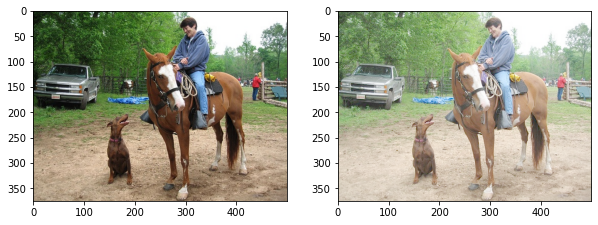

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")

out = img.astype(np.float).copy()
out /= 255.
out = (1/1 * out) ** (1/2.2)
out *= 255
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)


